# Noise whitening

Check what happens to noise spectrum
if we convolve in real space, no padding
if we convolve in fourier space with padding


$$
\mathrm{Var} (f(k)) \equiv
\left\langle \left|f(k)-\langle f(k)\rangle \right|^2\right\rangle, \mathrm{where}\ f(k)\in\mathbb{C}, Var(f(k)) \in \mathbb{R}\ge 0
$$

\begin{align}
\Re(r\cdot z) & = r\cdot\Re(z), \mathrm{where}\ r\in\mathbb{R}, z\in\mathbb{C} \\
|a+b|^2 & = |a|^2 + |b|^2 + 2\Re(a\cdot b^\star)\\
\end{align}

In [1]:
%matplotlib notebook
import numpy as np
import numpy.random
numpy.random.seed(2345)
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
%run -ni "../../scripts/DM-21868_Ndim_generic_padding.py"

See how a convolved white noise looks like

In [103]:
nx = 128
S = scipy.stats.norm.rvs(size=nx)
K = scipy.stats.norm.pdf(np.arange(-15,15.1),scale=2.)

plt.figure()
plt.plot(np.arange(len(K)),K,'.-')

In [95]:
SK = np.convolve(S,K,mode='same')

plt.figure()
plt.step(np.arange(len(S)),S,'.-',where='mid')
plt.step(np.arange(len(SK)),SK,'.-',where='mid')

Q: Which mode of `np.convolve` does not shift signals? (Where is the kernel origin?)

A: Kernel is centered. `same` mode clips of edges, this is what we want.

In [1]:
Z = np.zeros(128,dtype=float)
Z[10]=1.
ZK = np.convolve(Z,K,mode='same')
# The convolution puts the origin of K in the middle

plt.figure()
plt.step(np.arange(len(Z)),Z,where='mid')
#plt.plot(np.arange(len(K)),K,'.-')
plt.step(np.arange(len(ZK)),ZK,where='mid')

NameError: name 'np' is not defined

In [108]:
KP = padCenterOriginArray(K,(128,))

KPF = np.fft.fft(KP)

plt.figure()
plt.step(np.arange(len(KP)),KP,where='mid')
plt.step(np.arange(len(KP)),np.real(KPF*np.conj(KPF)),where='mid')

Absolute^2 in freq. space for simple white noise and convolved one

<IPython.core.display.Javascript object>


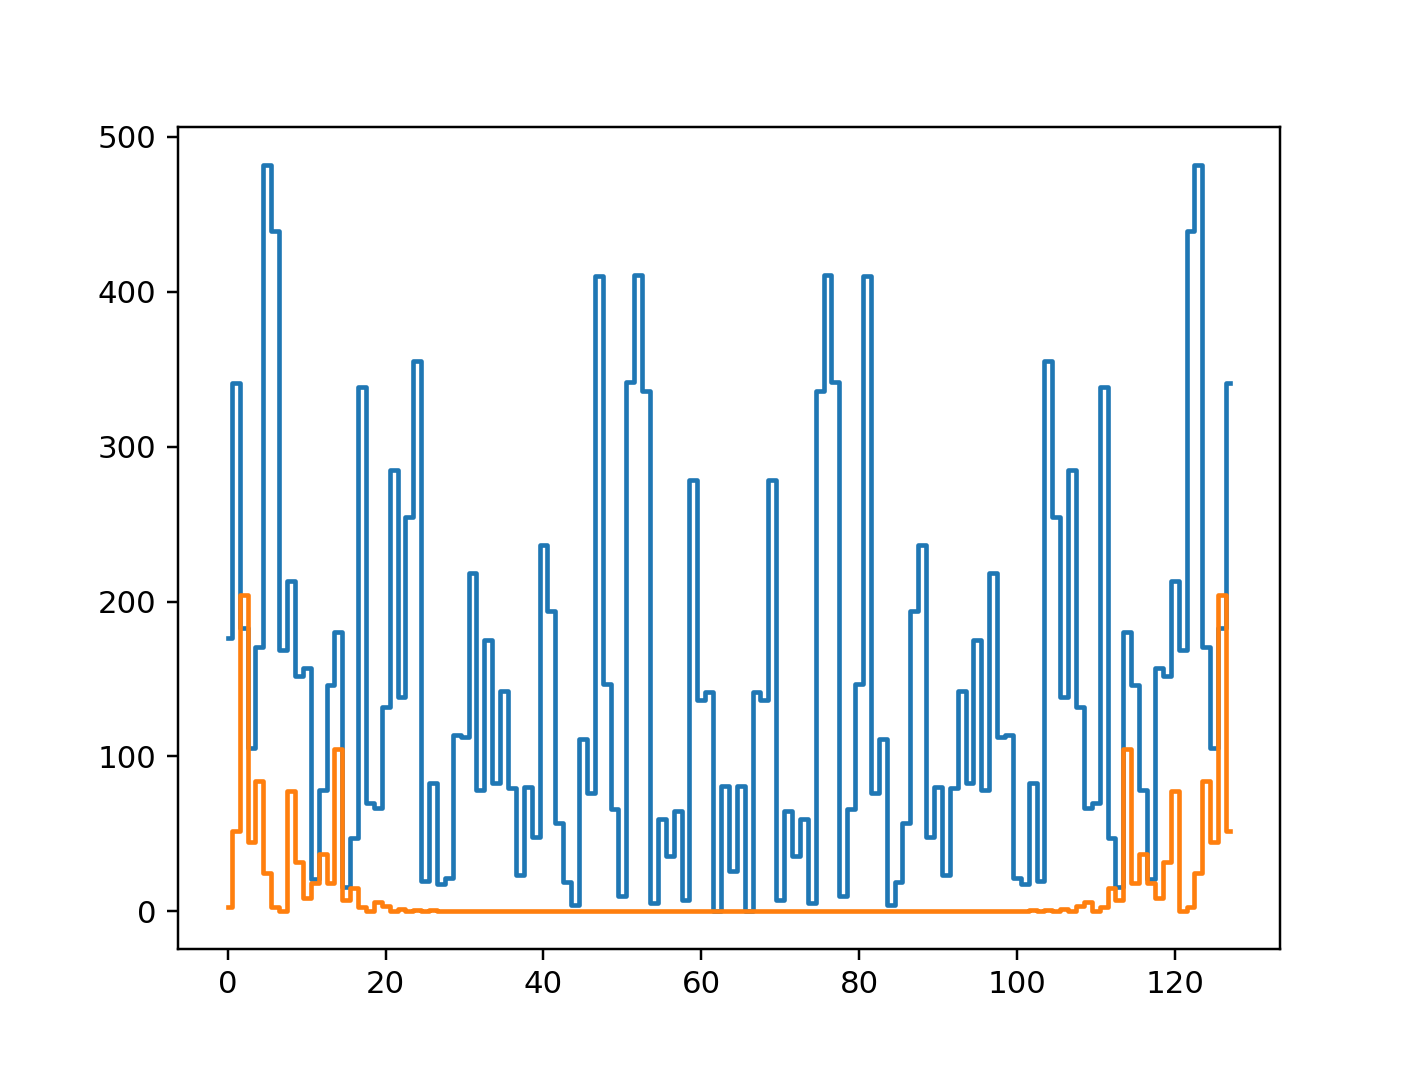

In [127]:
SF = np.fft.fft(S)
SKF = np.fft.fft(SK)
plt.figure()
plt.step(np.arange(len(SF)),np.real(SF*np.conj(SF)),where='mid')
plt.step(np.arange(len(SKF)),np.real(SKF*np.conj(SKF)),where='mid')

To see the variance as a function of $k$, repeat the above and average $|f(k)|^2$ for estimation.

K=scipy.stats.norm.pdf(np.arange(-15,15.1),scale=2.)
var_sf = np.zeros(nx,dtype=float)
var_skf = np.zeros(nx,dtype=float)
for i in range(1000):
    S=scipy.stats.norm.rvs(size=nx)
    SK = np.convolve(S,K,mode='same')
    SF = np.fft.fft(S)
    SKF = np.fft.fft(SK)
    var_sf += np.real(SF*np.conj(SF))
    var_skf += np.real(SKF*np.conj(SKF))
var_sf /= 1000.
var_skf /= 1000.
plt.figure()
plt.step(np.arange(len(var_sf)),var_sf,where='mid')
plt.step(np.arange(len(var_skf)),var_skf,where='mid')

<IPython.core.display.Javascript object>


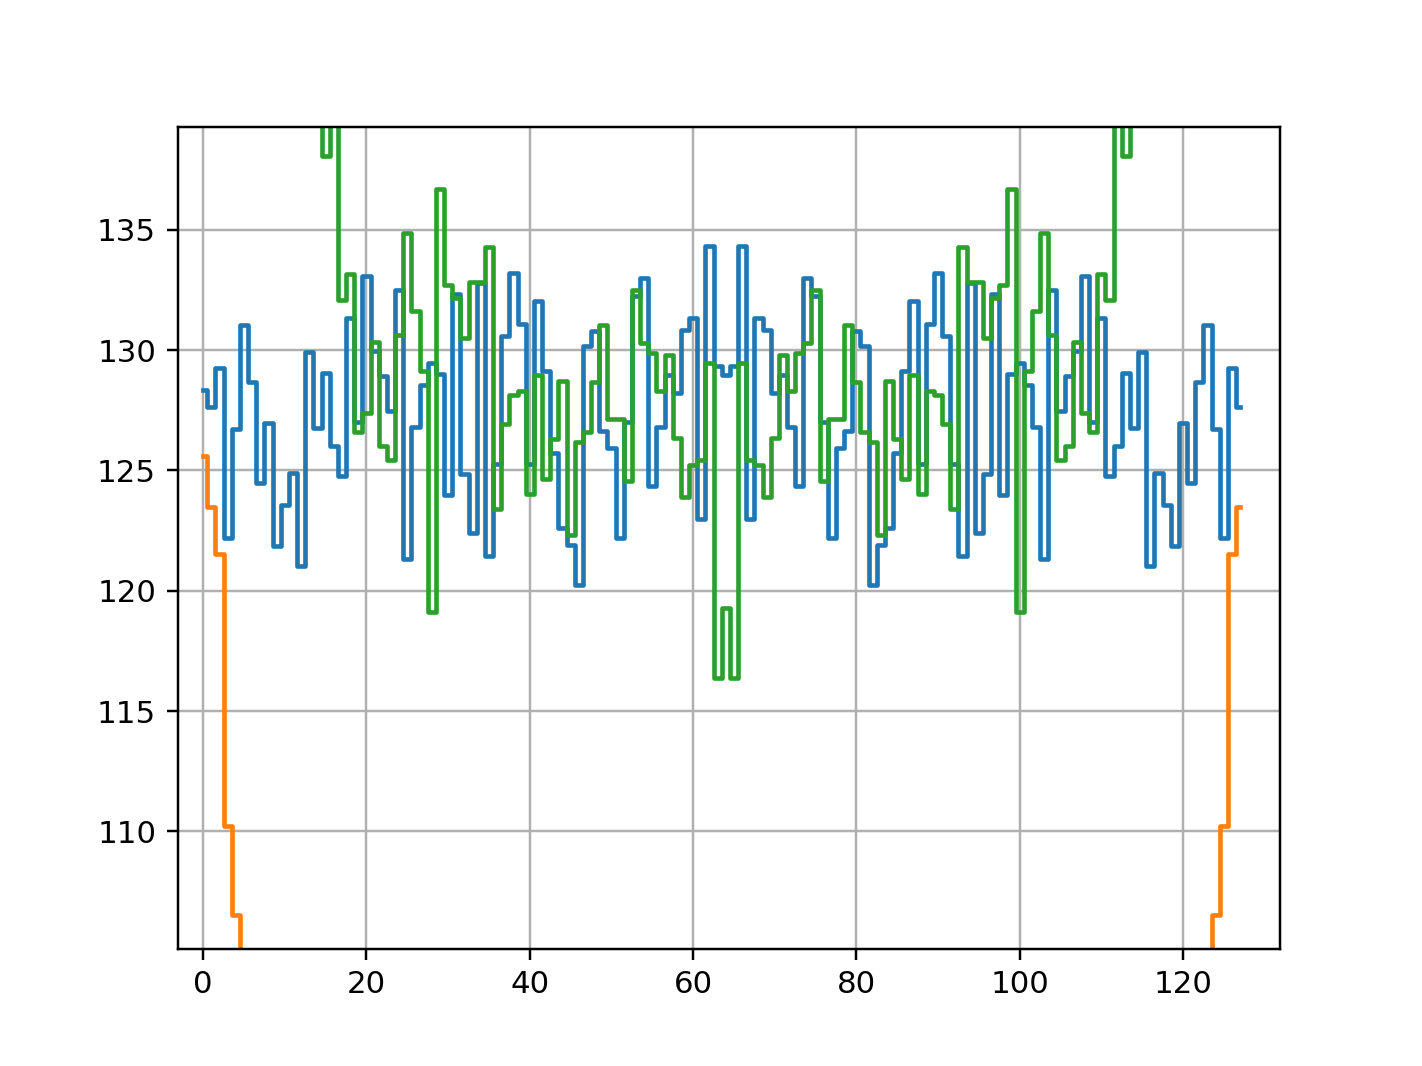

In [131]:
K=scipy.stats.norm.pdf(np.arange(-15,15.1),scale=2.)
var_sf = np.zeros(nx,dtype=float)
var_skf = np.zeros(nx,dtype=float)
var_sdf = np.zeros(nx,dtype=float)
for i in range(1000):
    S=scipy.stats.norm.rvs(size=nx)
    SK = np.convolve(S,K,mode='same')
    S2=scipy.stats.norm.rvs(size=nx)
    SDF = np.fft.fft(S2-SK)
    SF = np.fft.fft(S)
    SKF = np.fft.fft(SK)
    var_sf += np.real(SF*np.conj(SF))
    var_skf += np.real(SKF*np.conj(SKF))
    var_sdf += np.real(SDF*np.conj(SDF))
var_sf /= 1000.
var_skf /= 1000.
var_sdf /= 1000.
plt.figure()
plt.step(np.arange(len(var_sf)),var_sf,where='mid')
plt.step(np.arange(len(var_skf)),var_skf,where='mid')
plt.step(np.arange(len(var_sdf)),var_sdf,where='mid')

<IPython.core.display.Javascript object>


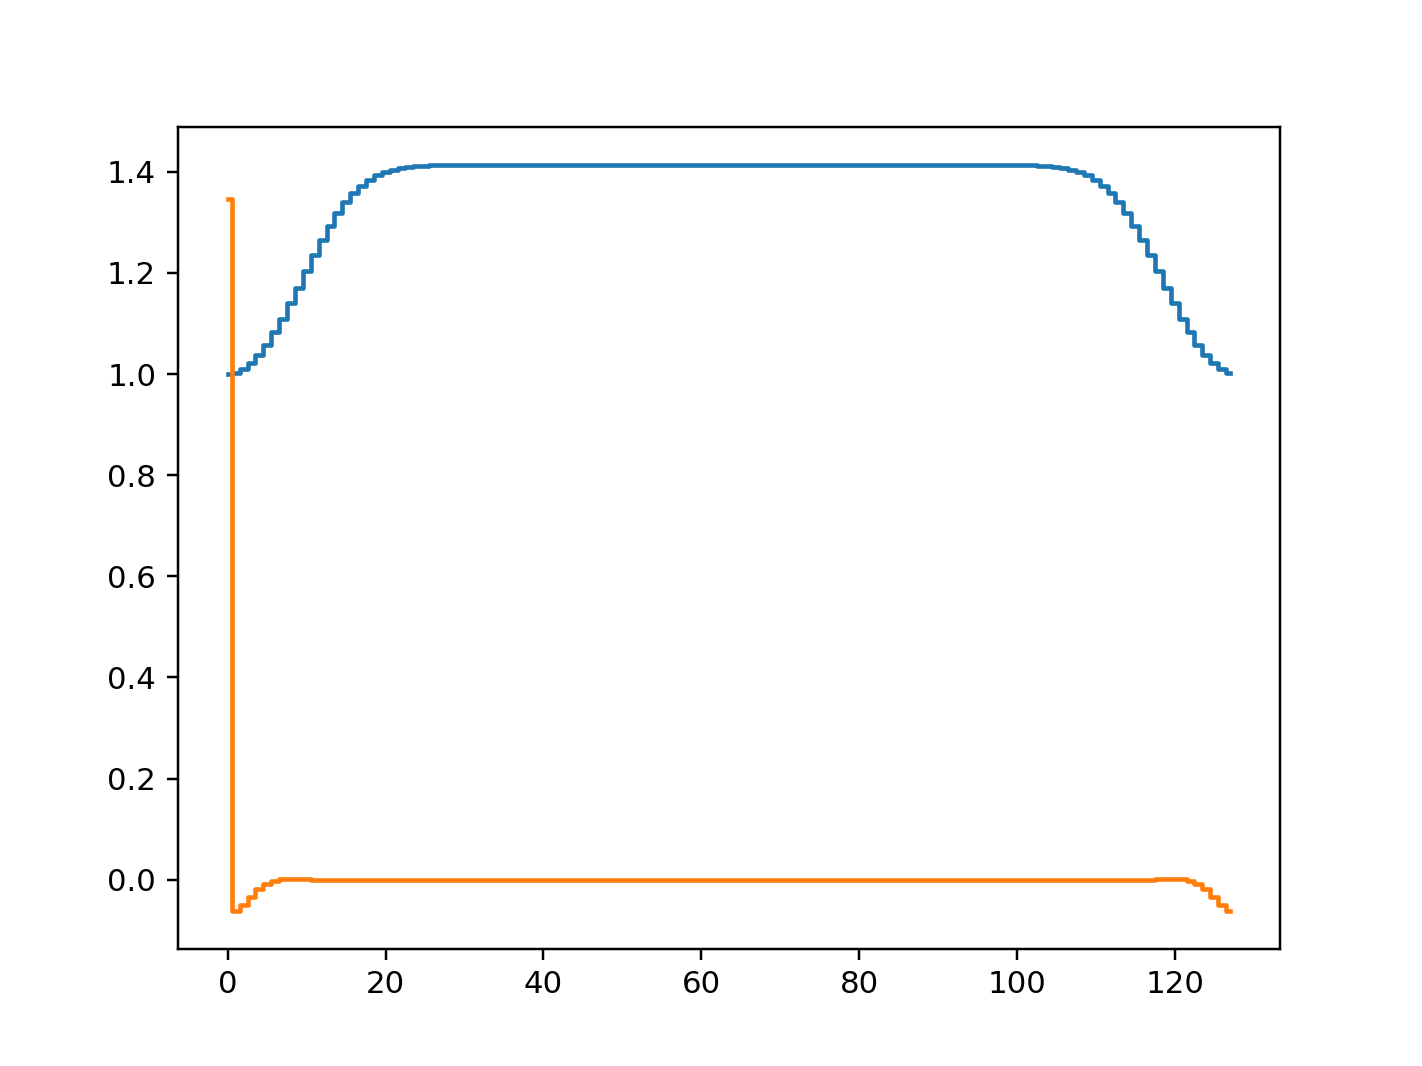

In [137]:
decorrF = np.sqrt(np.real(2./(1.+KPF*np.conj(KPF))))
decorrK = np.real(np.fft.ifft(decorrF))
plt.figure()
plt.step(np.arange(len(decorrF)),decorrF,where='mid')
plt.step(np.arange(len(decorrK)),decorrK,where='mid')

In [140]:
# Get the decorrelation kernel centered and cut back to its original size
D=padCenterOriginArray(decorrK,(31,),onwardOp=False)

<IPython.core.display.Javascript object>


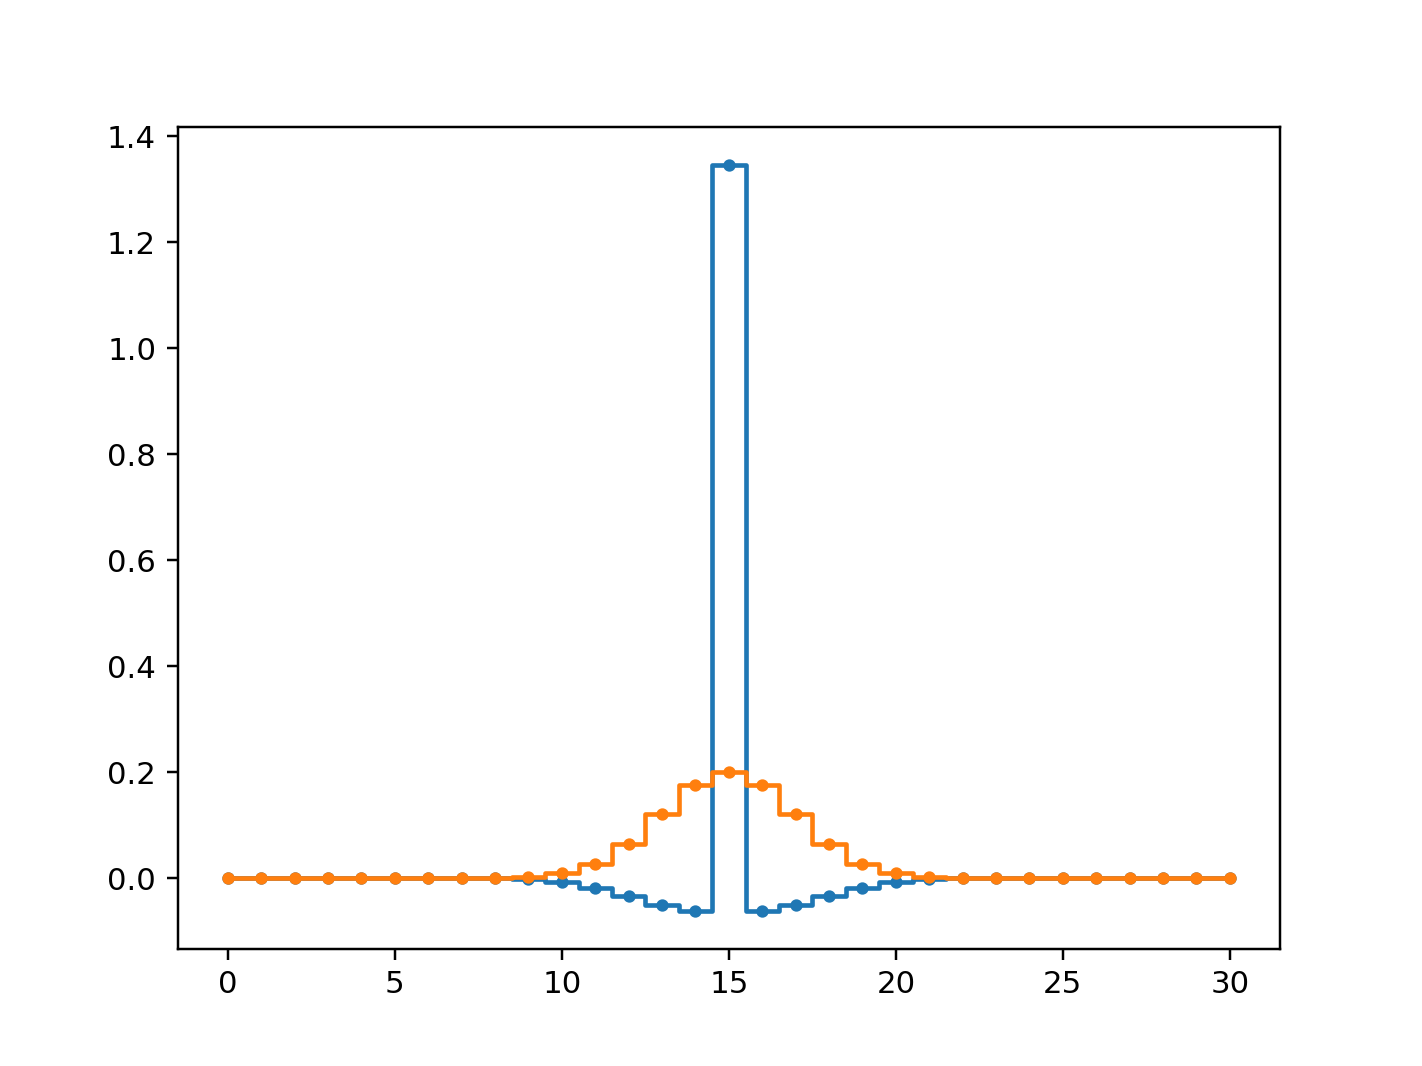

In [152]:
plt.figure()
plt.step(np.arange(len(D)),D,'.-',where='mid')
plt.step(np.arange(len(K)),K,'.-',where='mid')

<IPython.core.display.Javascript object>


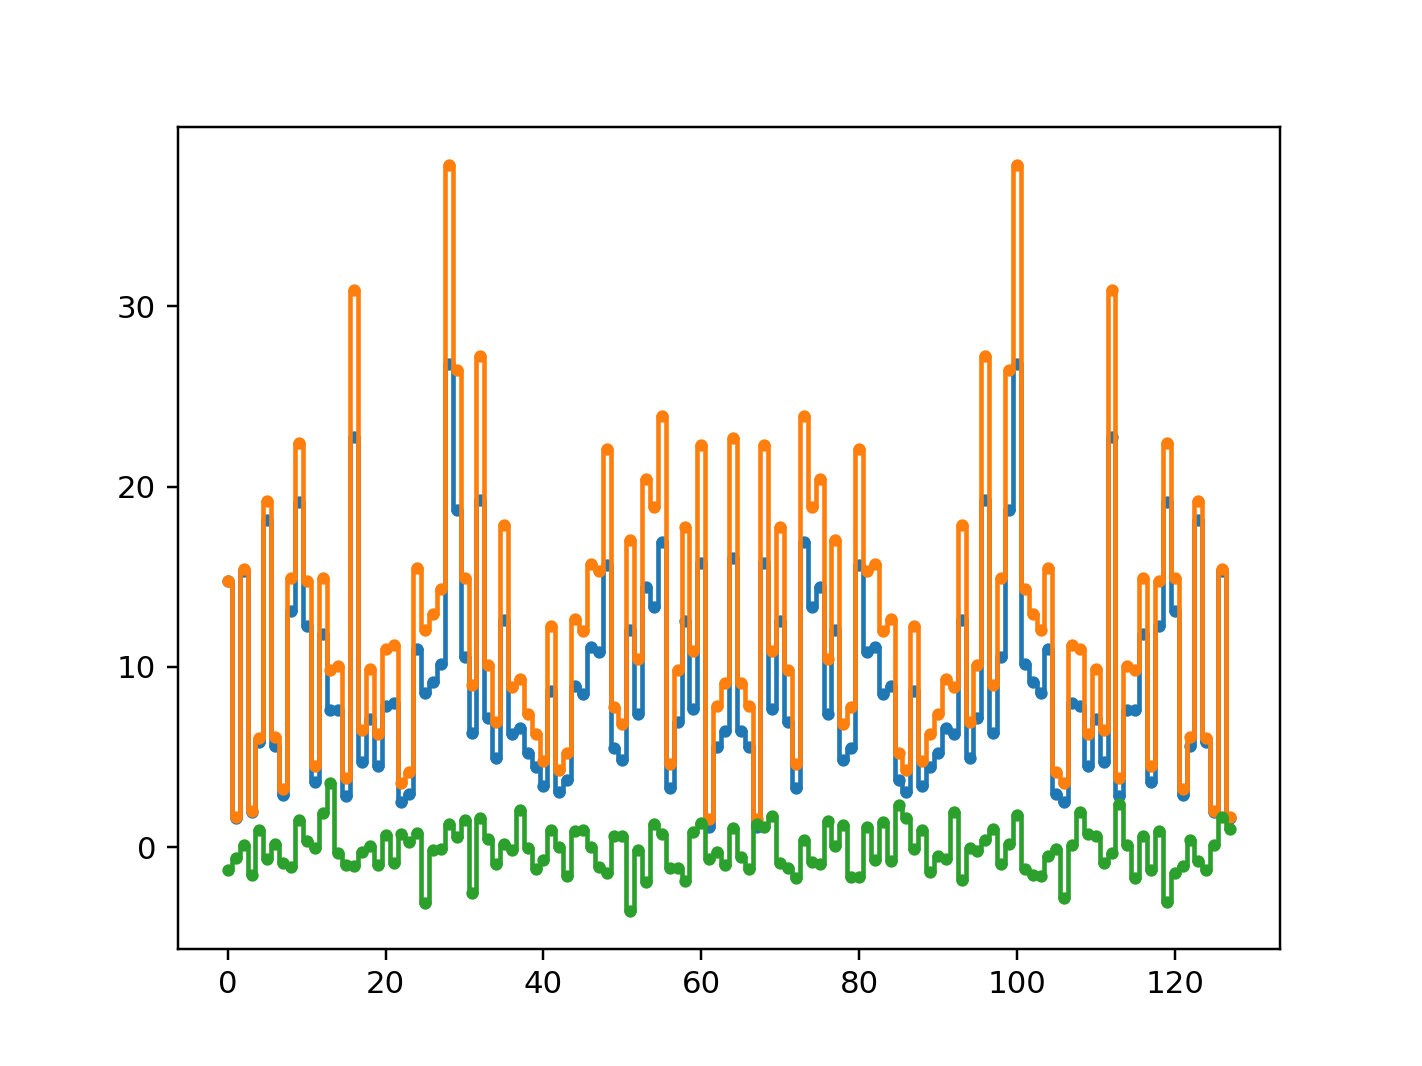

In [146]:
plt.figure()
plt.step(np.arange(len(SDF)),np.abs(SDF),'.-',where='mid')
plt.step(np.arange(len(SDF)),np.abs(SDF*decorrF),'.-',where='mid')


<IPython.core.display.Javascript object>


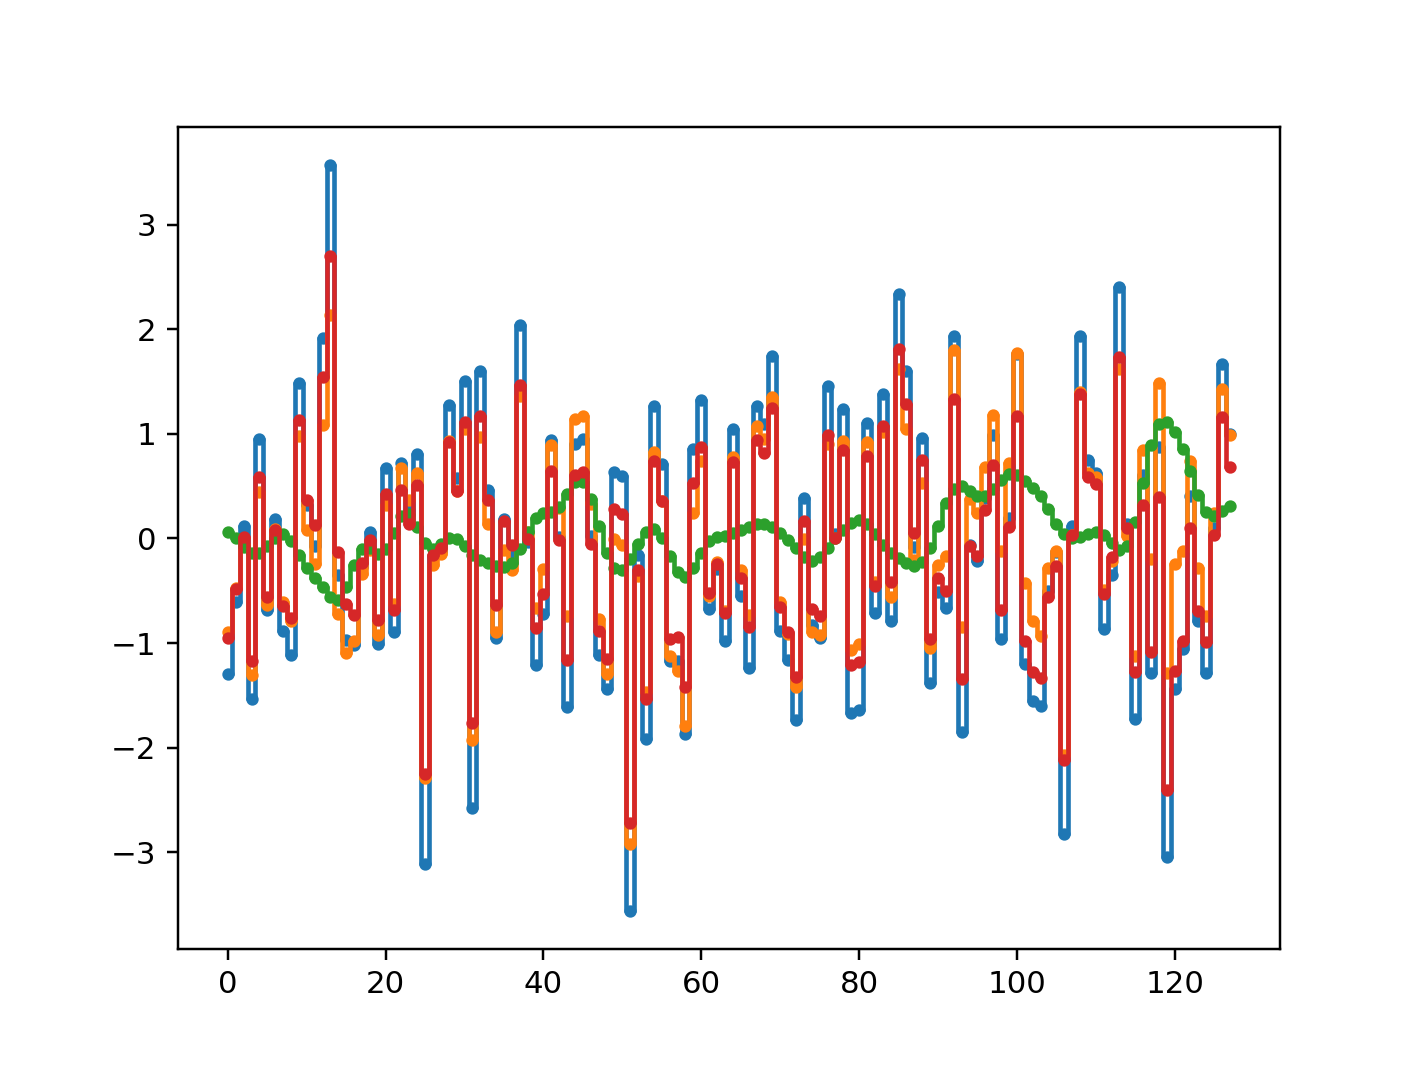

In [148]:
plt.figure()
plt.step(np.arange(len(SDF)),np.real(np.fft.ifft(SDF*decorrF)),'.-',where='mid')
plt.step(np.arange(len(S2)),S2,'.-',where='mid')
plt.step(np.arange(len(SK)),SK,'.-',where='mid')
plt.step(np.arange(len(S2)),S2-SK,'.-',where='mid')

Check how it looks with a signal in S2

In [ ]:
Z = np.zeros(nx,dtype=float)
Z[20]=100.
ZK = np.convolve(Z,K,mode='same')
S=scipy.stats.norm.rvs(size=nx)
SK = np.convolve(S,K,mode='same')
S2=scipy.stats.norm.rvs(size=nx) + ZK
SDF = np.fft.fft(S2-SK)
SF = np.fft.fft(S)
SKF = np.fft.fft(SK)
plt.figure()
plt.step(np.arange(len(SDF)),np.real(np.fft.ifft(SDF*decorrF)),'.-',where='mid')
plt.step(np.arange(len(S2)),S2-SK,'.-',where='mid')
plt.figure()
plt.step(np.arange(len(S2)),S2,'.-',where='mid')
plt.step(np.arange(len(SK)),SK,'.-',where='mid')

Check how the correction look like as a function of padding

<IPython.core.display.Javascript object>


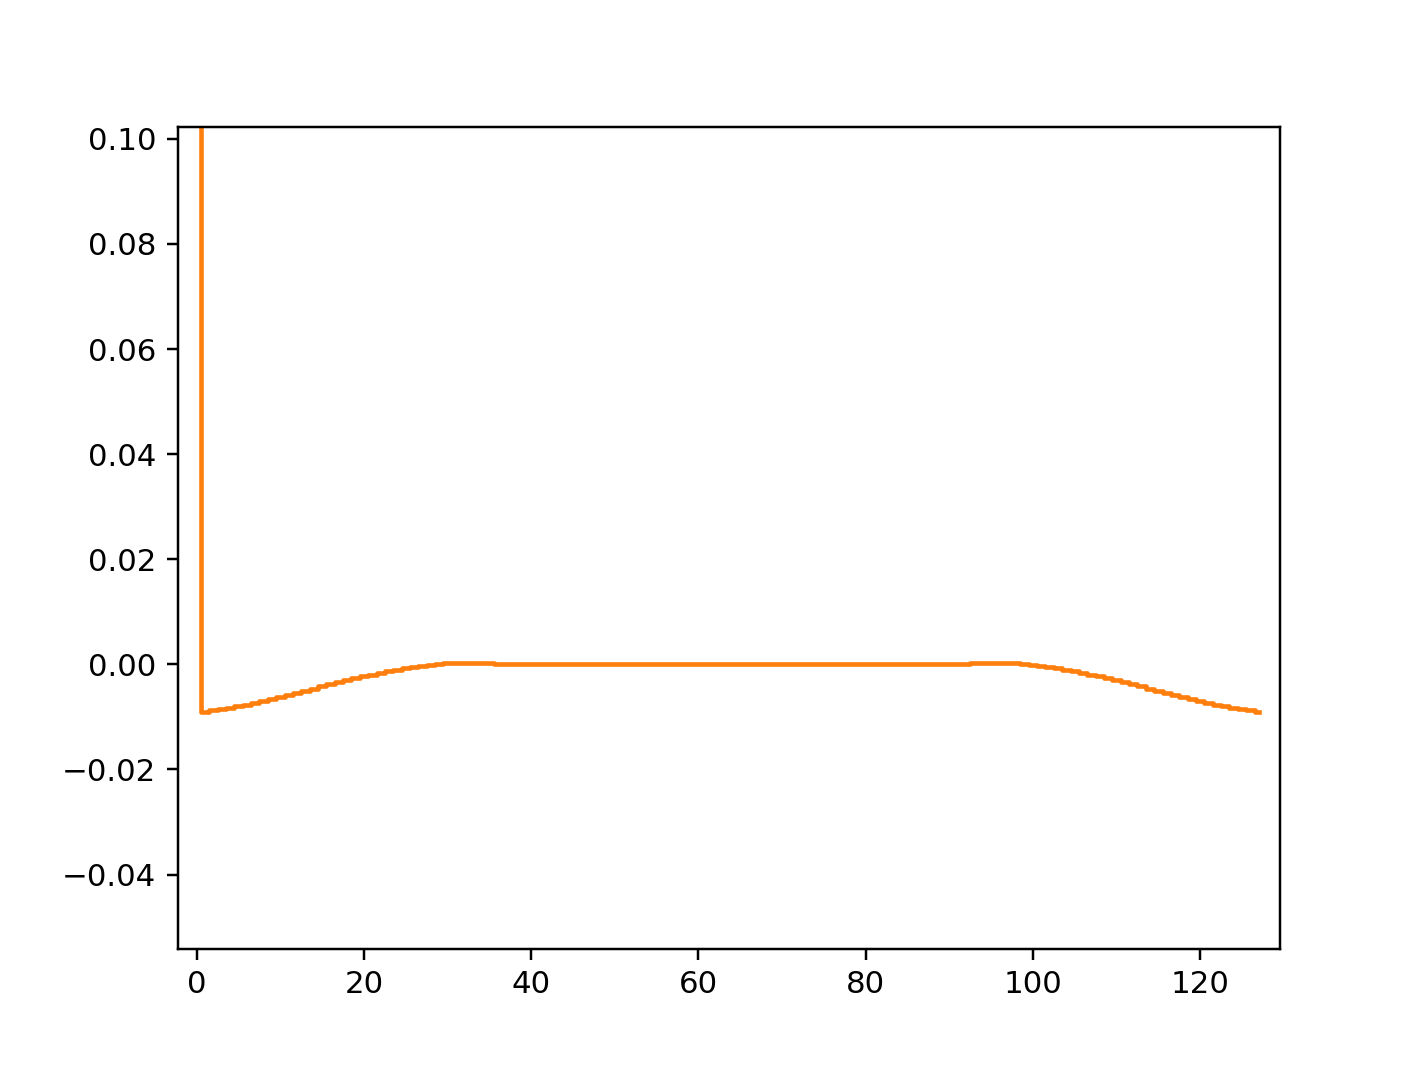

<IPython.core.display.Javascript object>


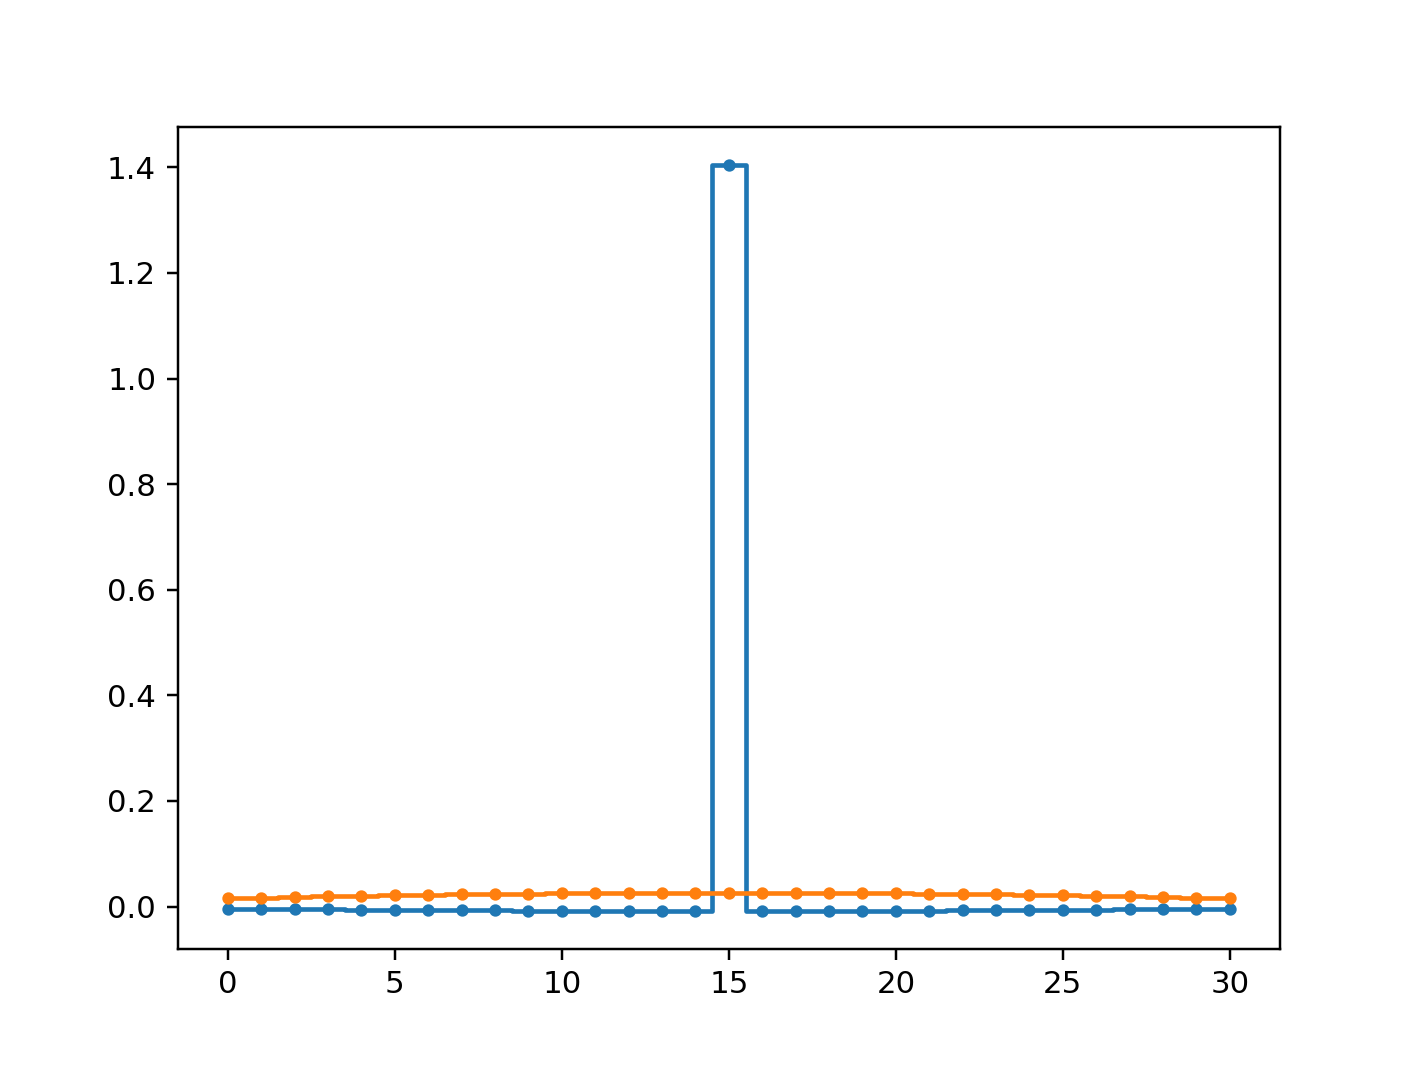

In [159]:
csize = 128
K=scipy.stats.norm.pdf(np.arange(-15,15.1),scale=15.)
osize = len(K)
KP = padCenterOriginArray(K,(csize,))
KPF = np.fft.fft(KP)
decorrF = np.sqrt(np.real(2./(1.+KPF*np.conj(KPF))))
decorrK = np.real(np.fft.ifft(decorrF))
D=padCenterOriginArray(decorrK,(osize,),onwardOp=False)

plt.figure()
plt.step(np.arange(len(decorrF)),decorrF,where='mid')
plt.step(np.arange(len(decorrK)),decorrK,where='mid')

plt.figure()
plt.step(np.arange(len(D)),D,'.-',where='mid')
plt.step(np.arange(len(K)),K,'.-',where='mid')

<IPython.core.display.Javascript object>


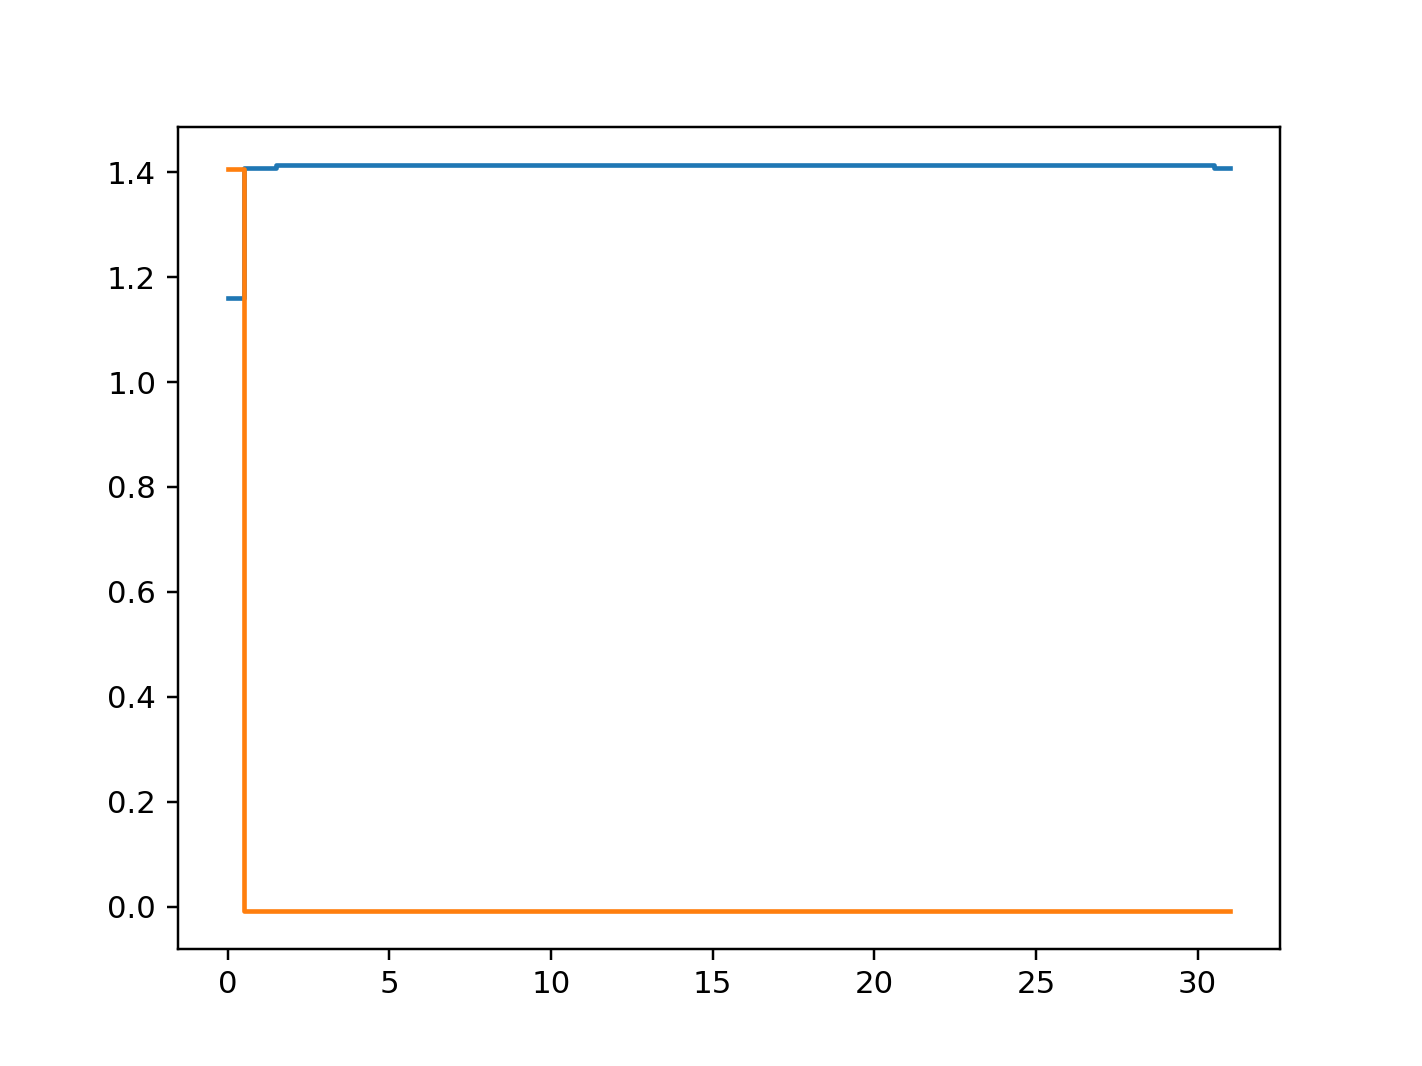

<IPython.core.display.Javascript object>


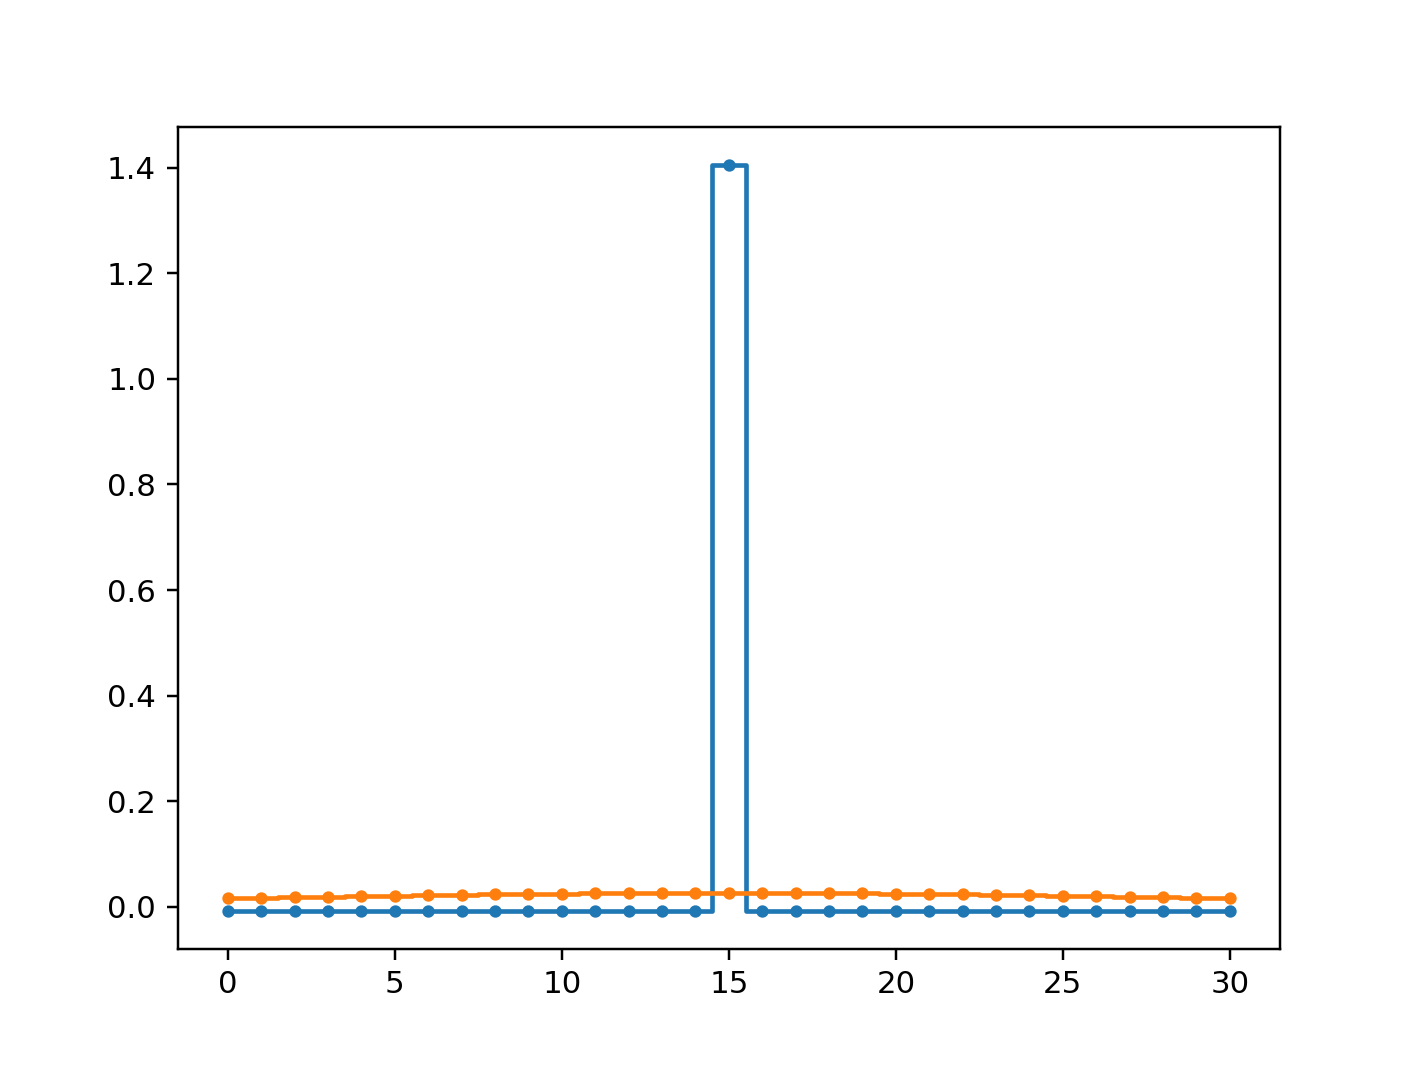

In [160]:
csize = 32
K=scipy.stats.norm.pdf(np.arange(-15,15.1),scale=15.)
osize = len(K)
KP = padCenterOriginArray(K,(csize,))
KPF = np.fft.fft(KP)
decorrF = np.sqrt(np.real(2./(1.+KPF*np.conj(KPF))))
decorrK = np.real(np.fft.ifft(decorrF))
D=padCenterOriginArray(decorrK,(osize,),onwardOp=False)

plt.figure()
plt.step(np.arange(len(decorrF)),decorrF,where='mid')
plt.step(np.arange(len(decorrK)),decorrK,where='mid')

plt.figure()
plt.step(np.arange(len(D)),D,'.-',where='mid')
plt.step(np.arange(len(K)),K,'.-',where='mid')

Check image padding

<IPython.core.display.Javascript object>


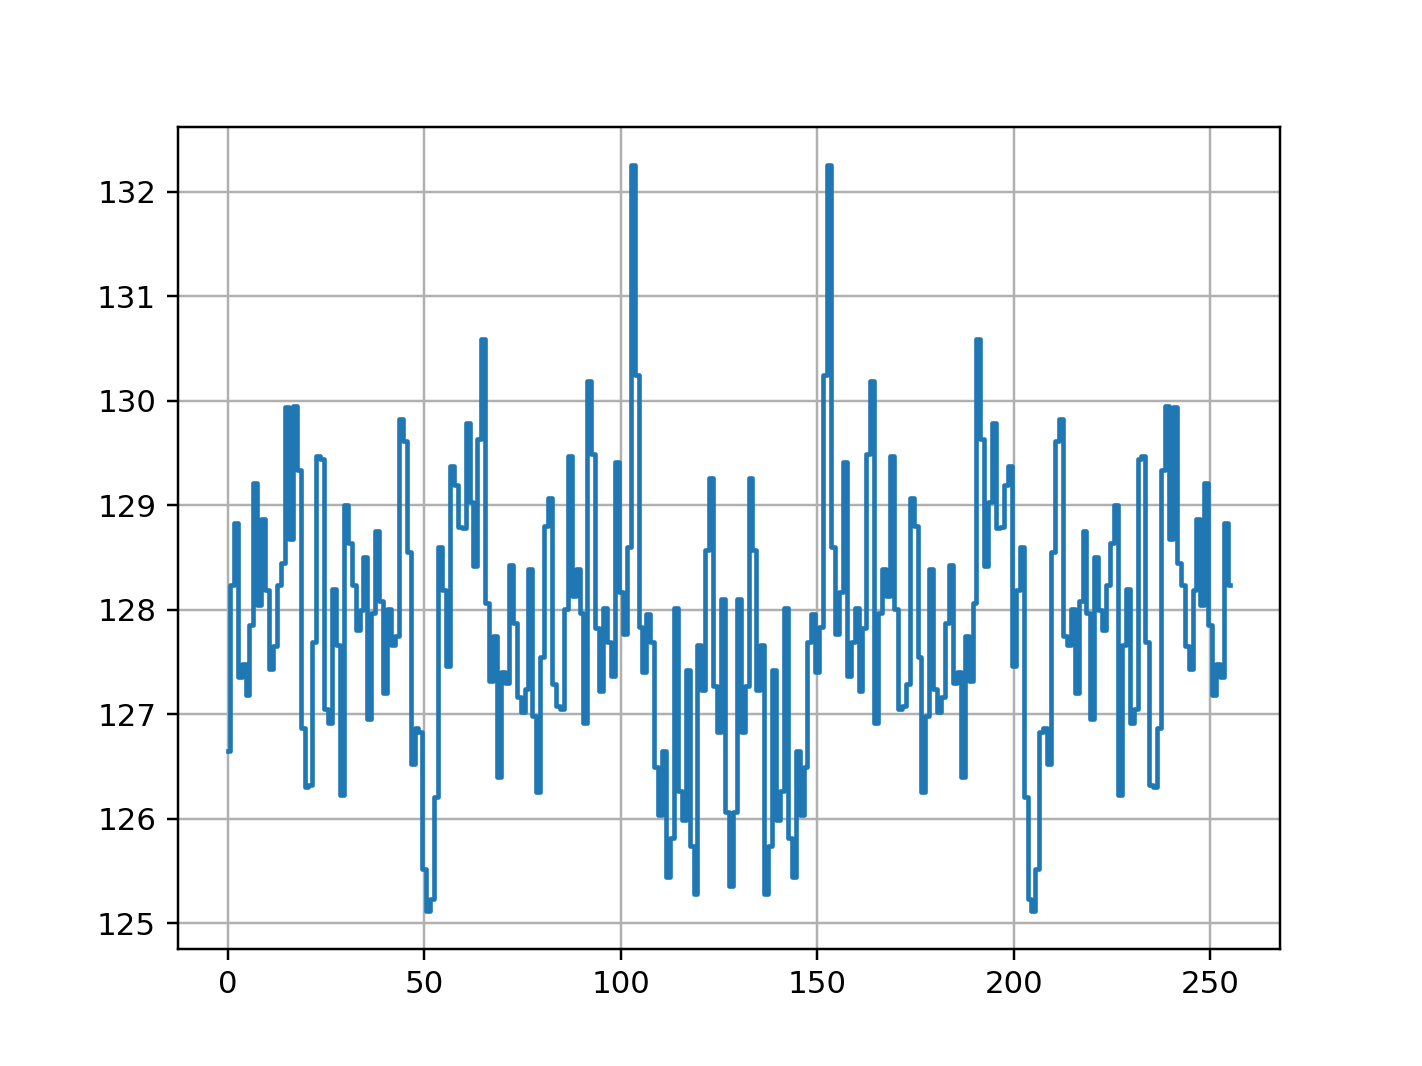

In [223]:
nx = 128
cshape = 256
K=scipy.stats.norm.pdf(np.arange(-15,15.1),scale=2.)
var_sf = np.zeros(cshape,dtype=float)
var_skf = np.zeros(cshape,dtype=float)
var_sdf = np.zeros(cshape,dtype=float)
for i in range(10000):
    S=scipy.stats.norm.rvs(size=nx)
    SK = np.convolve(S,K,mode='same')
    S2 = scipy.stats.norm.rvs(size=nx)
    S = padCenterOriginArray(S, (cshape,))
    S2 = padCenterOriginArray(S2, (cshape,))
    SK = padCenterOriginArray(SK, (cshape,))
    SF = np.fft.fft(S)
    SKF = np.fft.fft(SK)
    SDF = np.fft.fft(S2-SK)
    var_sf += np.real(SF*np.conj(SF))
    var_skf += np.real(SKF*np.conj(SKF))
    var_sdf += np.real(SDF*np.conj(SDF))
var_sf /= 10000.
var_skf /= 10000.
var_sdf /= 10000.
plt.figure()
plt.step(np.arange(len(var_sf)),var_sf,where='mid')
#plt.step(np.arange(len(var_skf)),var_skf,where='mid')
#plt.step(np.arange(len(var_sdf)),var_sdf,where='mid')

<IPython.core.display.Javascript object>


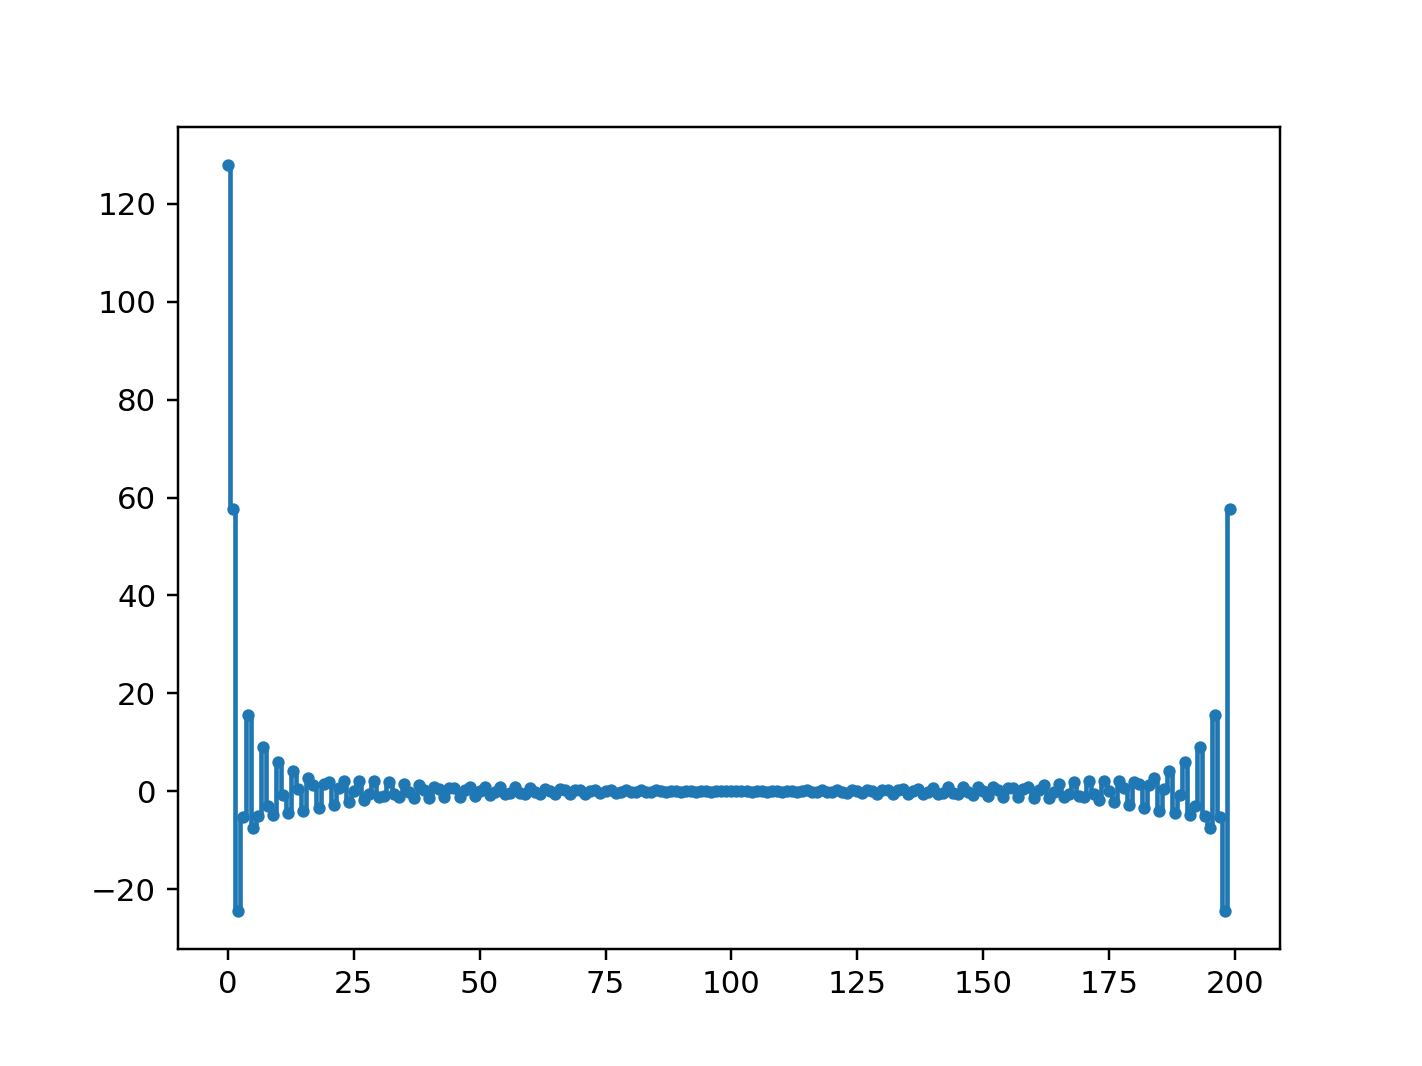

In [167]:
# A padded dataset can be represented as a "full" * window function which is convolution if k-space.
# But circular convolution with such a complicated structure is not very visual.
nx=128
cshape=200
W=np.ones(nx,dtype=float)
S=scipy.stats.norm.rvs(size=nx)
SK = np.convolve(S,K,mode='same')
S2=scipy.stats.norm.rvs(size=nx)
W = padCenterOriginArray(W,(cshape,))
S = padCenterOriginArray(S,(cshape,))
S2 = padCenterOriginArray(S2, (cshape,))
SK = padCenterOriginArray(SK, (cshape,))
SF = np.fft.fft(S)
SKF = np.fft.fft(SK)
SDF = np.fft.fft(S2-SK)
WF = np.fft.fft(W)
plt.figure()
plt.step(np.arange(cshape),WF,'.-',where='mid')

Play with different kerne shapes and padding
Note that a small Gaussian is special, there the decorrelation solution is contained within the
original sizes but not in general, particularly if weights at the edge of the kernel is high

<IPython.core.display.Javascript object>


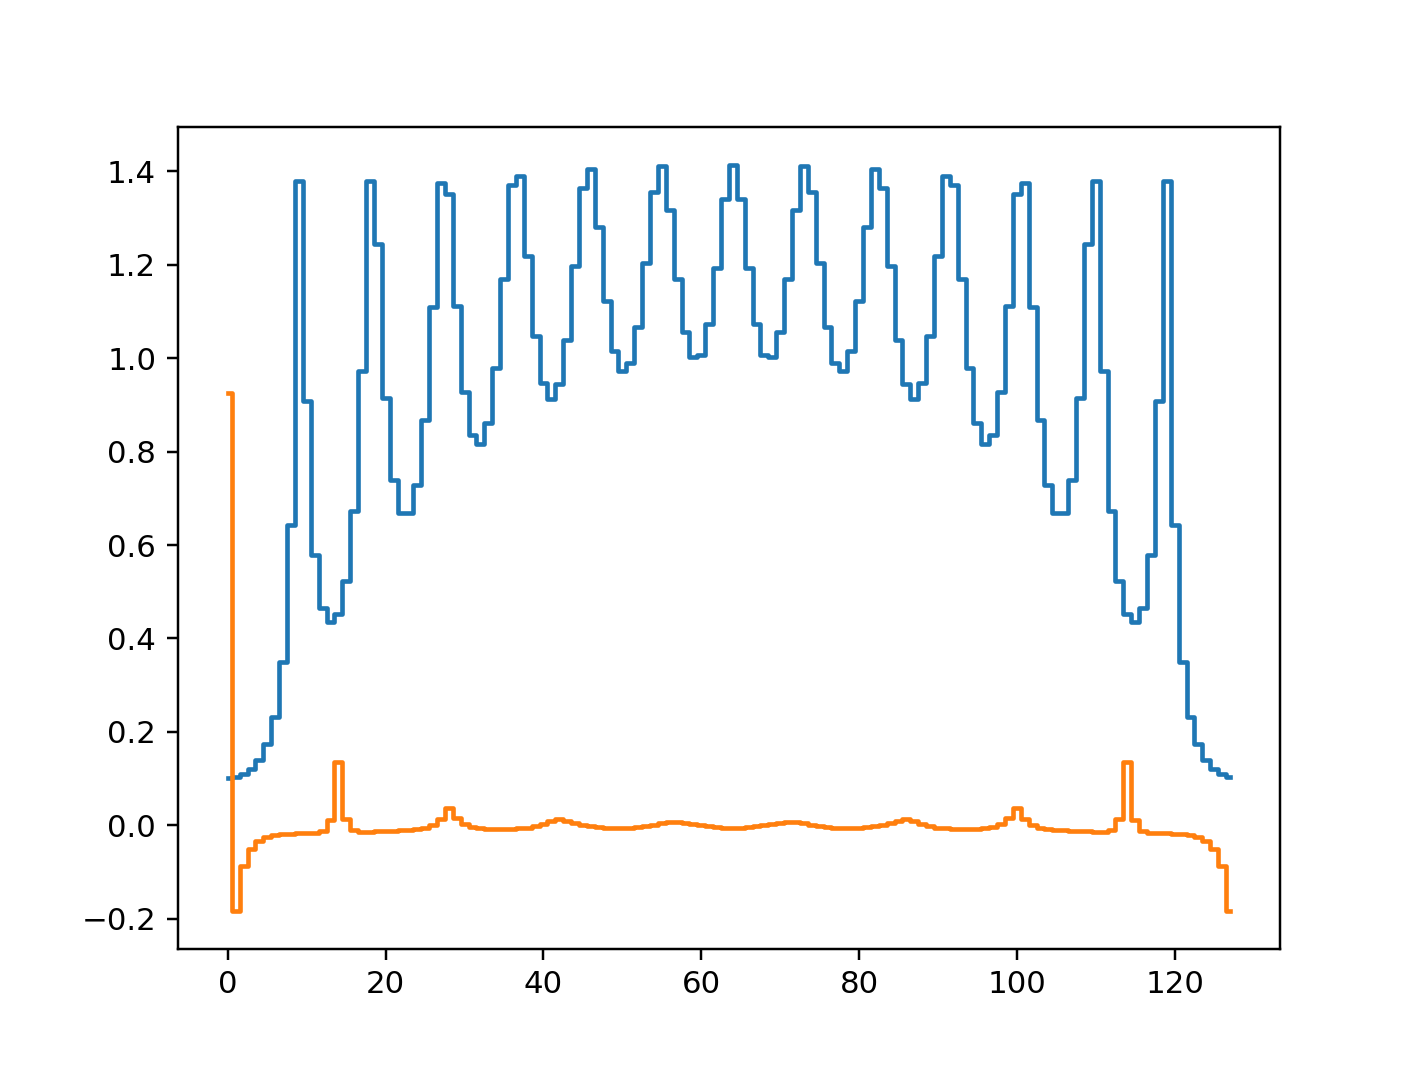

<IPython.core.display.Javascript object>


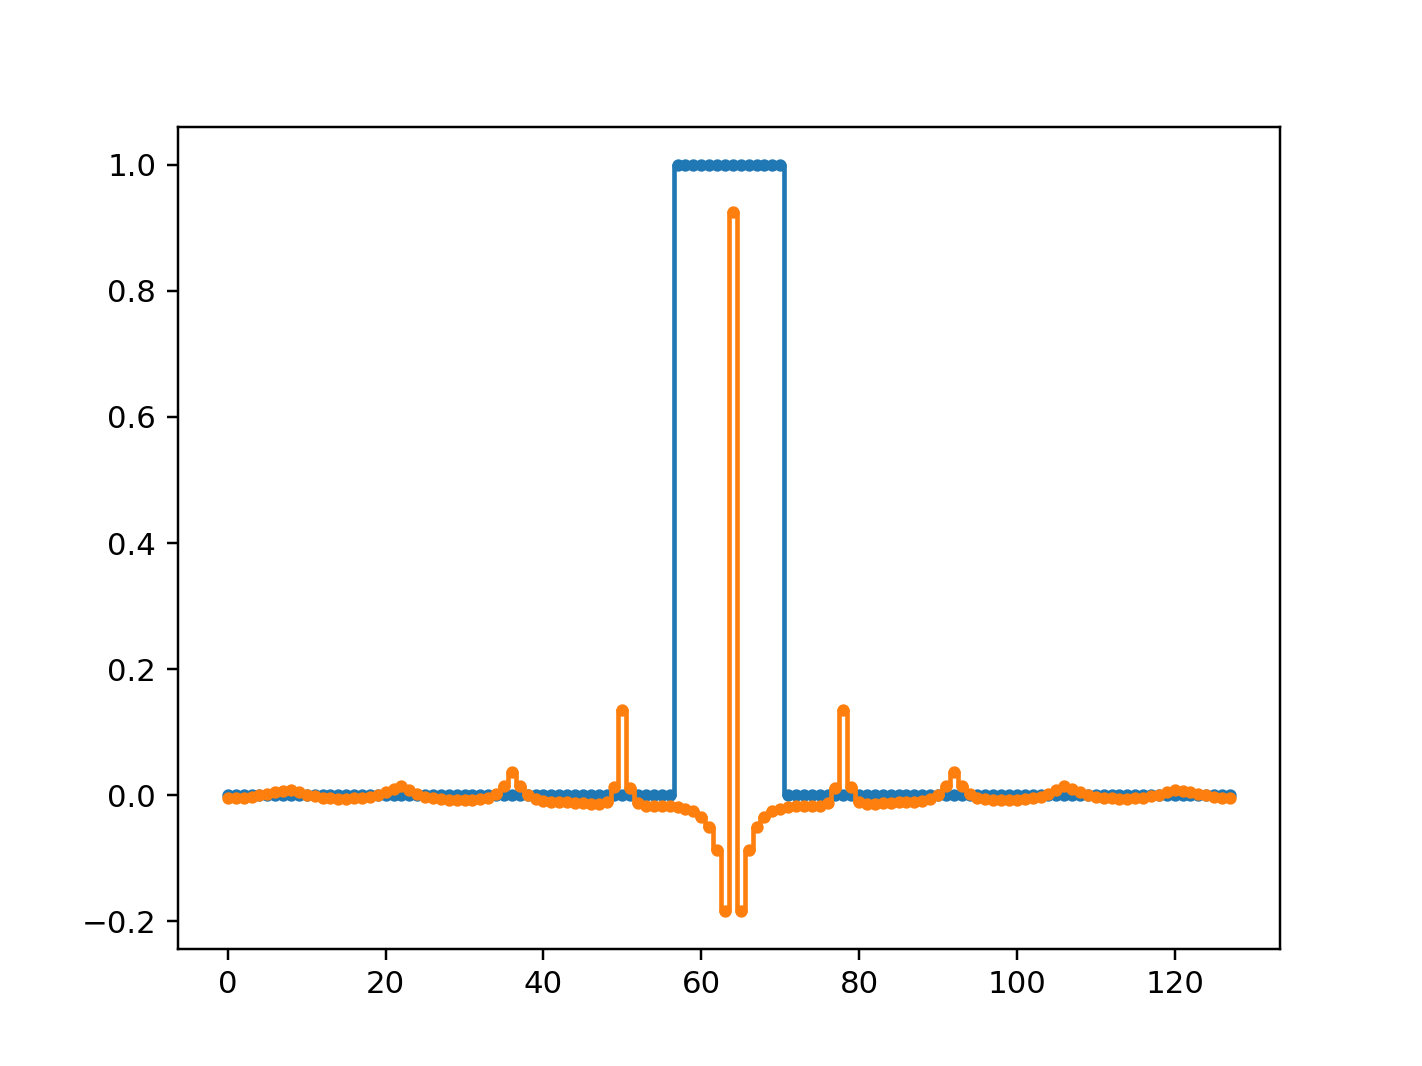

In [25]:
csize = 128
K=np.zeros(31,dtype=float)
K[8:22]=1.
#K=scipy.stats.norm.pdf(np.arange(-15,15.1),scale=15.)
osize = len(K)
KP = padCenterOriginArray(K,(csize,))
KPF = np.fft.fft(KP)
decorrF = np.sqrt(np.real(2./(1.+KPF*np.conj(KPF))))
decorrK = np.real(np.fft.ifft(decorrF))
D=padCenterOriginArray(decorrK,(osize,),onwardOp=False)

plt.figure()
plt.step(np.arange(len(decorrF)),decorrF,where='mid')
plt.step(np.arange(len(decorrK)),decorrK,where='mid')

plt.figure()
plt.step(np.arange(len(KP)),padCenterOriginArray(KP,(csize,),onwardOp=False),'.-',where='mid')
plt.step(np.arange(len(decorrK)),padCenterOriginArray(decorrK,(csize,),onwardOp=False),'.-',where='mid')

See the solution on log scales, to see the spatial variation

0.9980982908536381


<IPython.core.display.Javascript object>


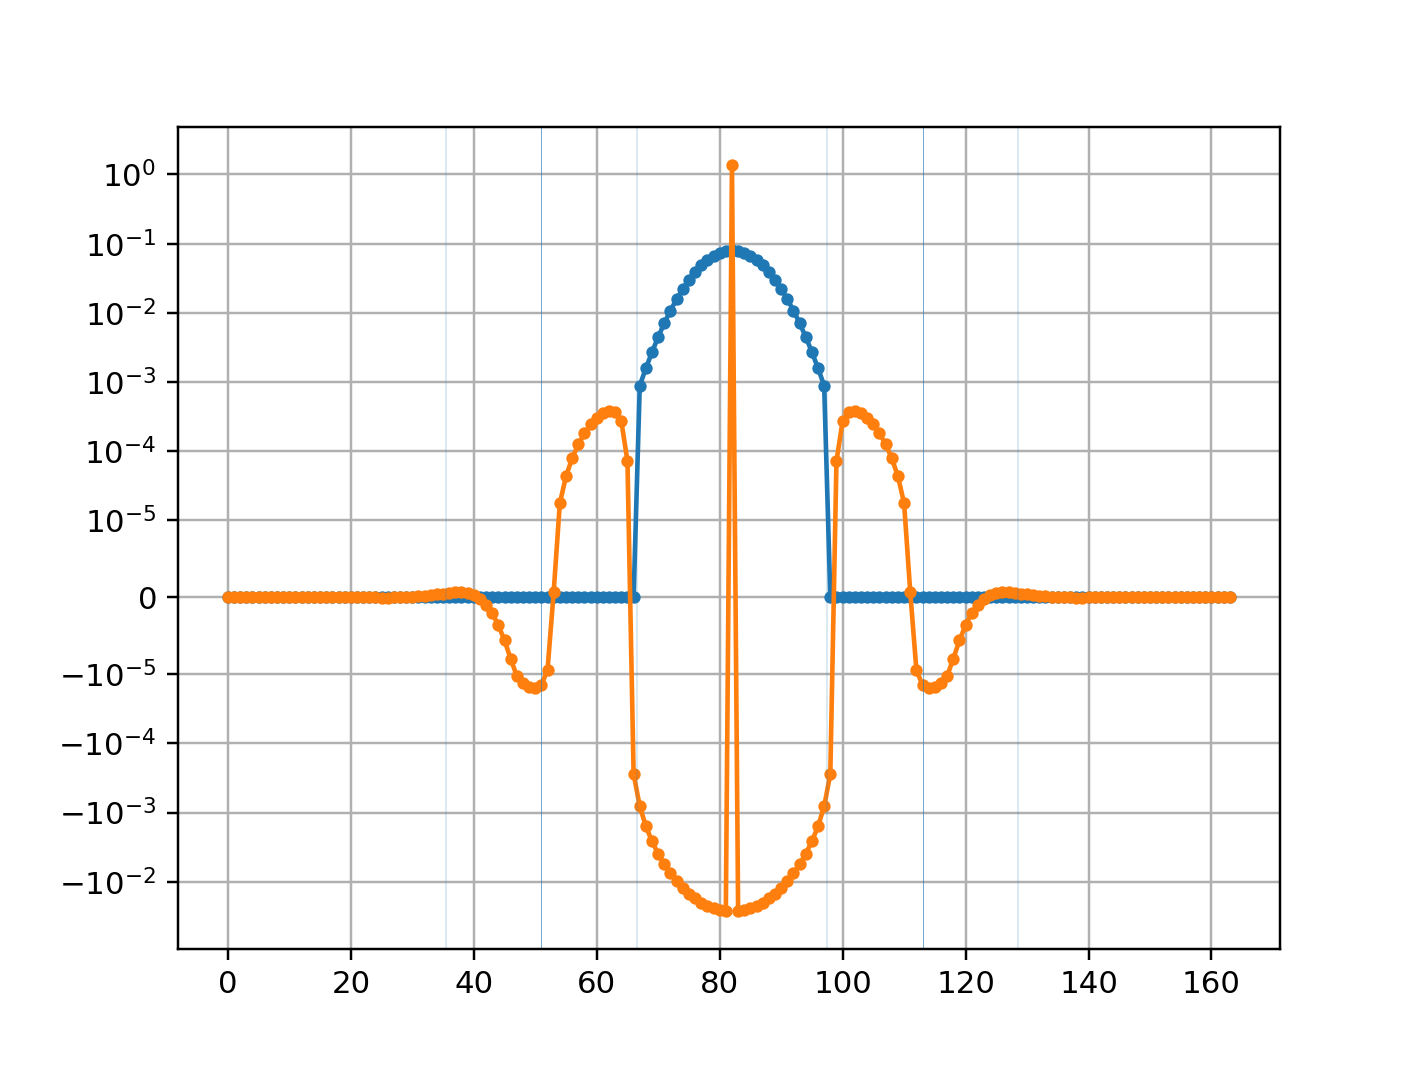

<IPython.core.display.Javascript object>


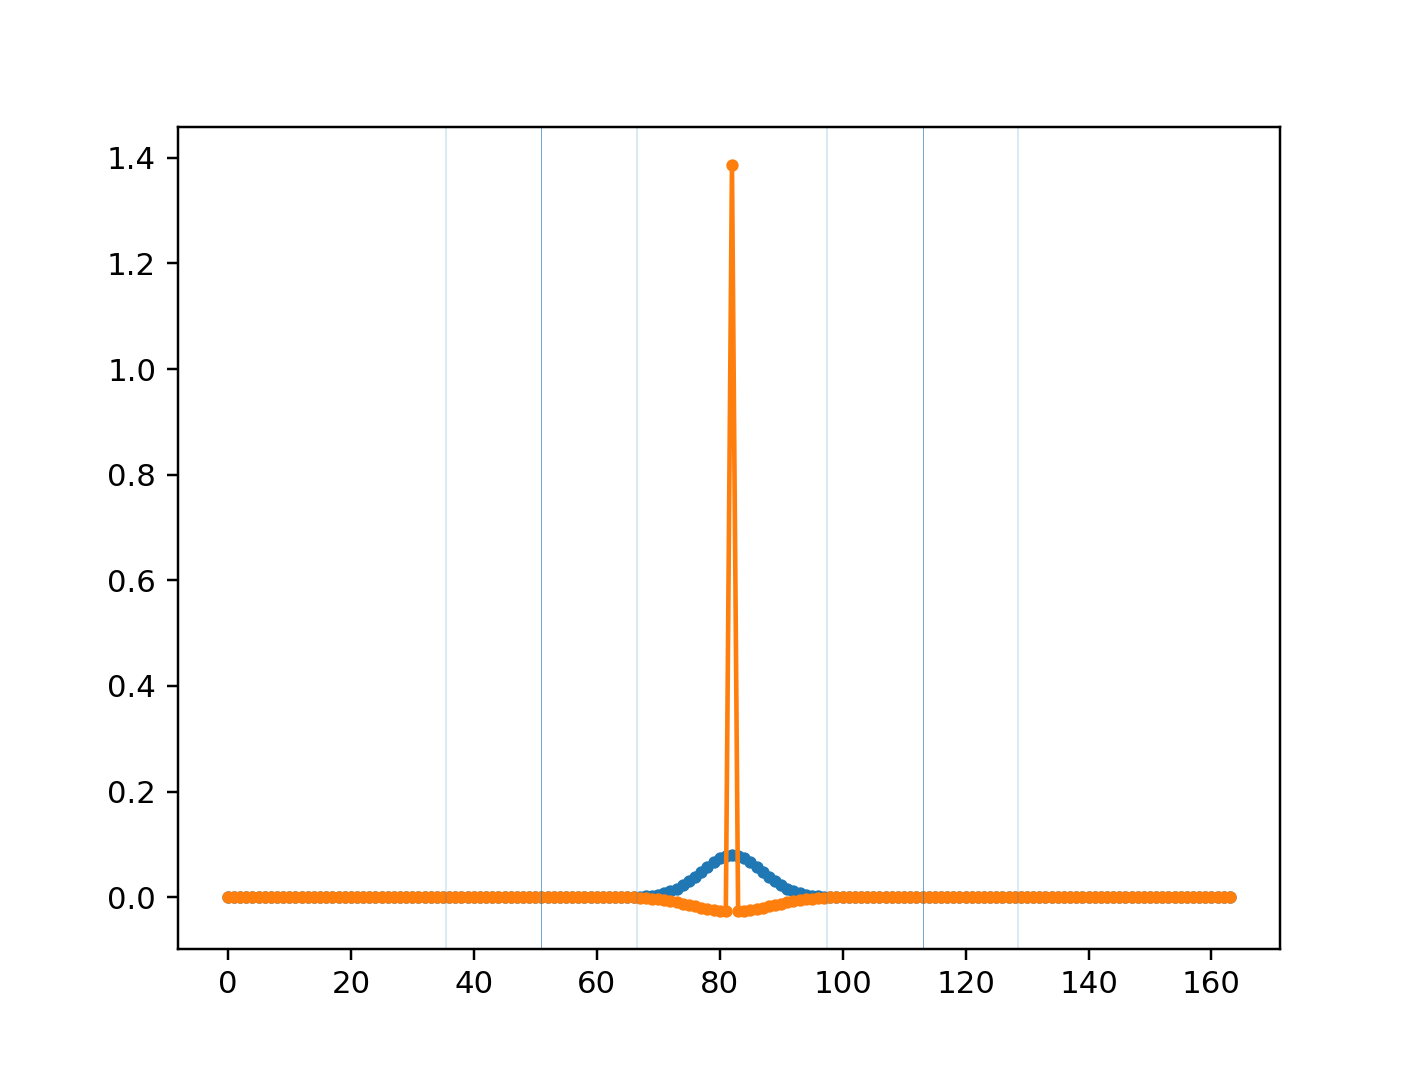

In [27]:
csize = 164
K=np.zeros(31,dtype=float)
#K[8:22]=1.
K=scipy.stats.norm.pdf(np.arange(-15,15.1),scale=5.)
print(np.sum(K))
K /= np.sum(K)
osize = len(K)
KP = padCenterOriginArray(K,(csize,))
KPF = np.fft.fft(KP)
decorrF = np.sqrt(np.real(2./(1.+KPF*np.conj(KPF))))
decorrK = np.real(np.fft.ifft(decorrF))
D = padCenterOriginArray(decorrK,(osize,),onwardOp=False)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.arange(len(KP)),padCenterOriginArray(KP,(csize,),onwardOp=False),'.-')
ax.plot(np.arange(len(decorrK)),padCenterOriginArray(decorrK,(csize,),onwardOp=False),'.-')
ax.axvline(x=len(KP)/2 + osize*0.5,lw=0.1)
ax.axvline(x=len(KP)/2 - osize*0.5,lw=0.1)
ax.axvline(x=len(KP)/2 + osize,lw=0.2)
ax.axvline(x=len(KP)/2 - osize,lw=0.2)
ax.axvline(x=len(KP)/2 + osize*1.5,lw=0.1)
ax.axvline(x=len(KP)/2 - osize*1.5,lw=0.1)

ax.set_yscale('symlog',linthreshy=0.00001)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.arange(len(KP)),padCenterOriginArray(KP,(csize,),onwardOp=False),'.-')
ax.plot(np.arange(len(decorrK)),padCenterOriginArray(decorrK,(csize,),onwardOp=False),'.-')
ax.axvline(x=len(KP)/2 + osize*0.5,lw=0.1)
ax.axvline(x=len(KP)/2 - osize*0.5,lw=0.1)
ax.axvline(x=len(KP)/2 + osize,lw=0.2)
ax.axvline(x=len(KP)/2 - osize,lw=0.2)
ax.axvline(x=len(KP)/2 + osize*1.5,lw=0.1)
ax.axvline(x=len(KP)/2 - osize*1.5,lw=0.1)

Check the variance for one and two dirac deltas

Arbitrary number of dirac delta normal variables leads to a zero expectation value at all frequency.

<IPython.core.display.Javascript object>


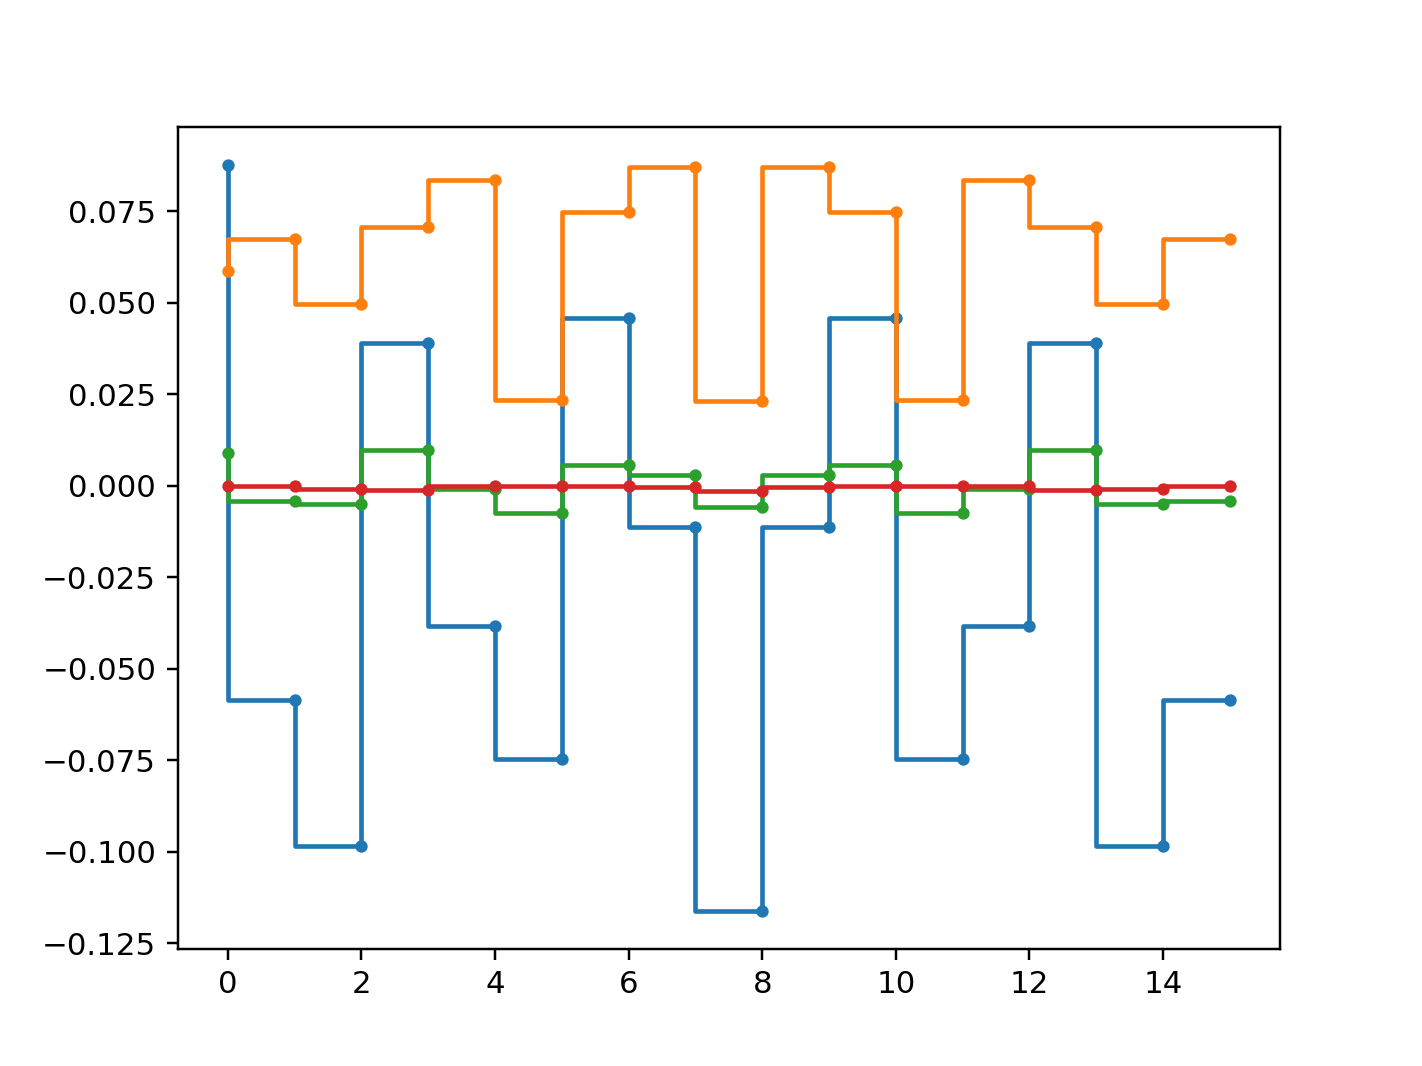

In [95]:
plt.figure()
def gen_expval(N):
    exp_sf = np.zeros(16,dtype=float)
    for i in range(N):
        S = np.zeros(16,dtype=float)
        # Arbitrary number of dirac deltas
        S[0] = scipy.stats.norm.rvs()
        S[3] = scipy.stats.norm.rvs()
        S[5] = scipy.stats.norm.rvs()
        S[10] = scipy.stats.norm.rvs()
        SF = np.fft.fft(S)
        # Get the real part of the expectation value
        exp_sf += np.real(SF)
    exp_sf /= N
    return exp_sf
exp_sf = gen_expval(100)
plt.step(np.arange(len(exp_sf)),exp_sf,'.-')
exp_sf = gen_expval(1000)
plt.step(np.arange(len(exp_sf)),exp_sf,'.-')
exp_sf = gen_expval(10000)
plt.step(np.arange(len(exp_sf)),exp_sf,'.-')
exp_sf = gen_expval(100000)
plt.step(np.arange(len(exp_sf)),exp_sf,'.-')

Now see the variance as a function of $k$.
\begin{equation}
Var(f(k)) = \langle |f(k)|^2 \rangle
\end{equation}
$|f(k)|^2$ is the FT of the $(f\star f)(x)$ autocorrelation.

<IPython.core.display.Javascript object>


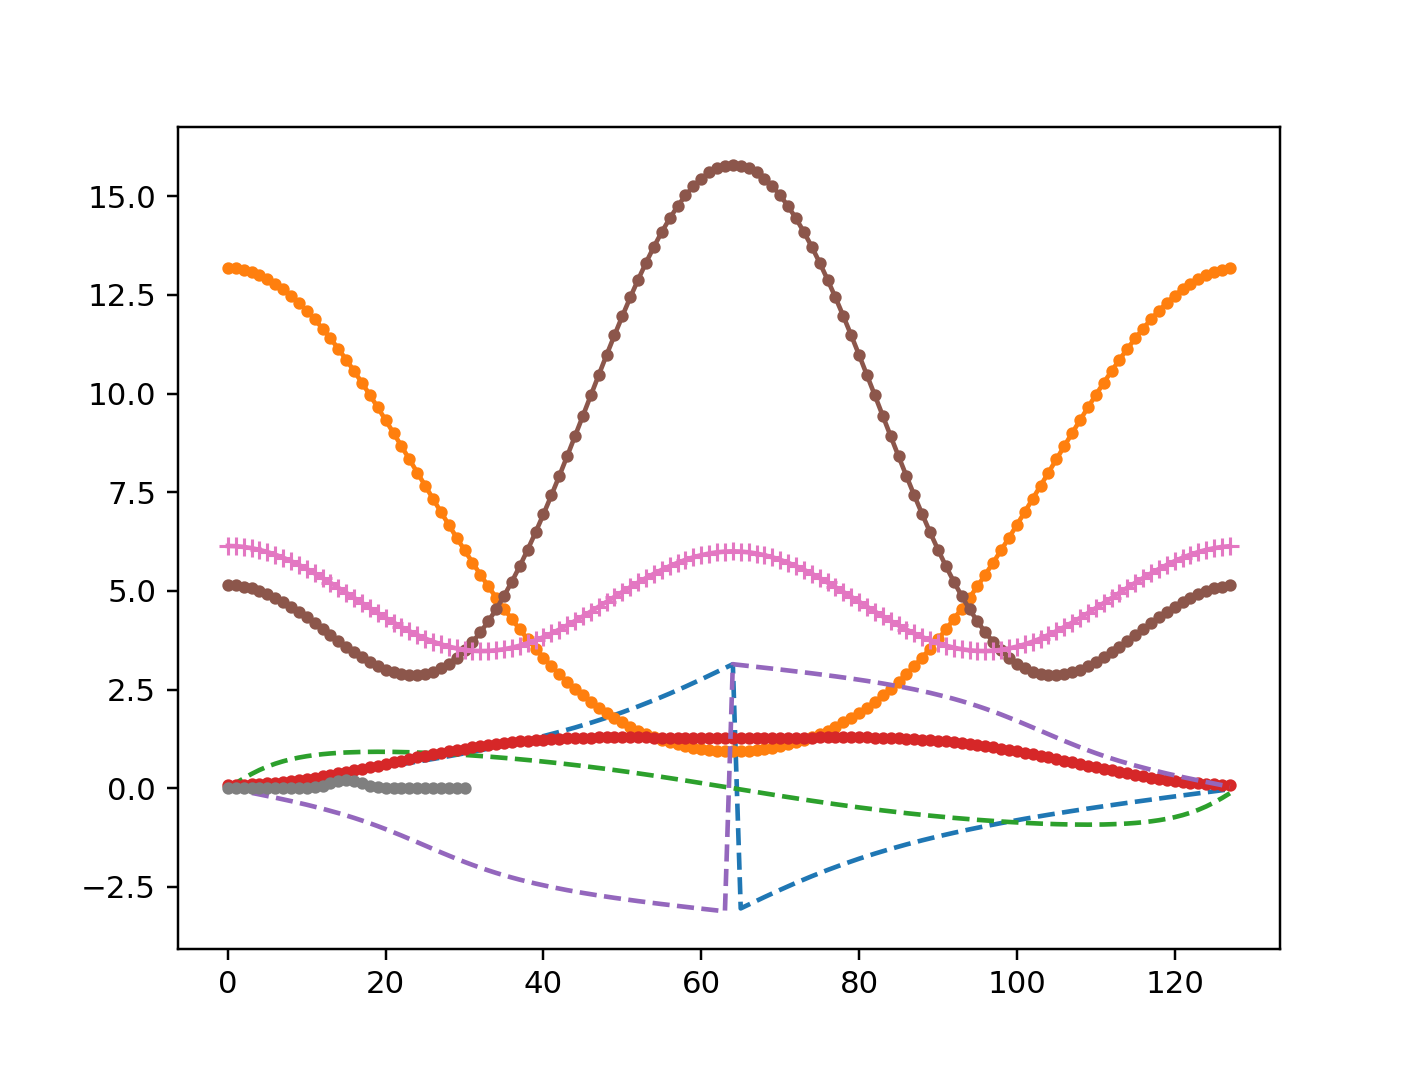

In [99]:
# 3 realisation of abs(f(k))^2
var_sf = np.zeros(128,dtype=float)
N = 3
plt.figure()
for i in range(N):
    S = np.zeros(128,dtype=float)
    S[0] = scipy.stats.norm.rvs()
    S[1] = scipy.stats.norm.rvs()
    S[-1] = scipy.stats.norm.rvs()
    SF = np.fft.fft(S)
    # Plot angle and absolute values
    plt.plot(np.arange(len(SF)),np.angle(SF),'--')
    plt.plot(np.arange(len(SF)),np.real(SF*np.conj(SF)),'.-')    
    var_sf += np.real(SF*np.conj(SF))
var_sf /= N
plt.plot(np.arange(len(var_sf)),var_sf,'+-')

Although 2 dirac delta with a distance introduce phase and new absolute value at a certain frequency, the phase shift at each $k$ averages out for uncorrelated dirac deltas.

<IPython.core.display.Javascript object>


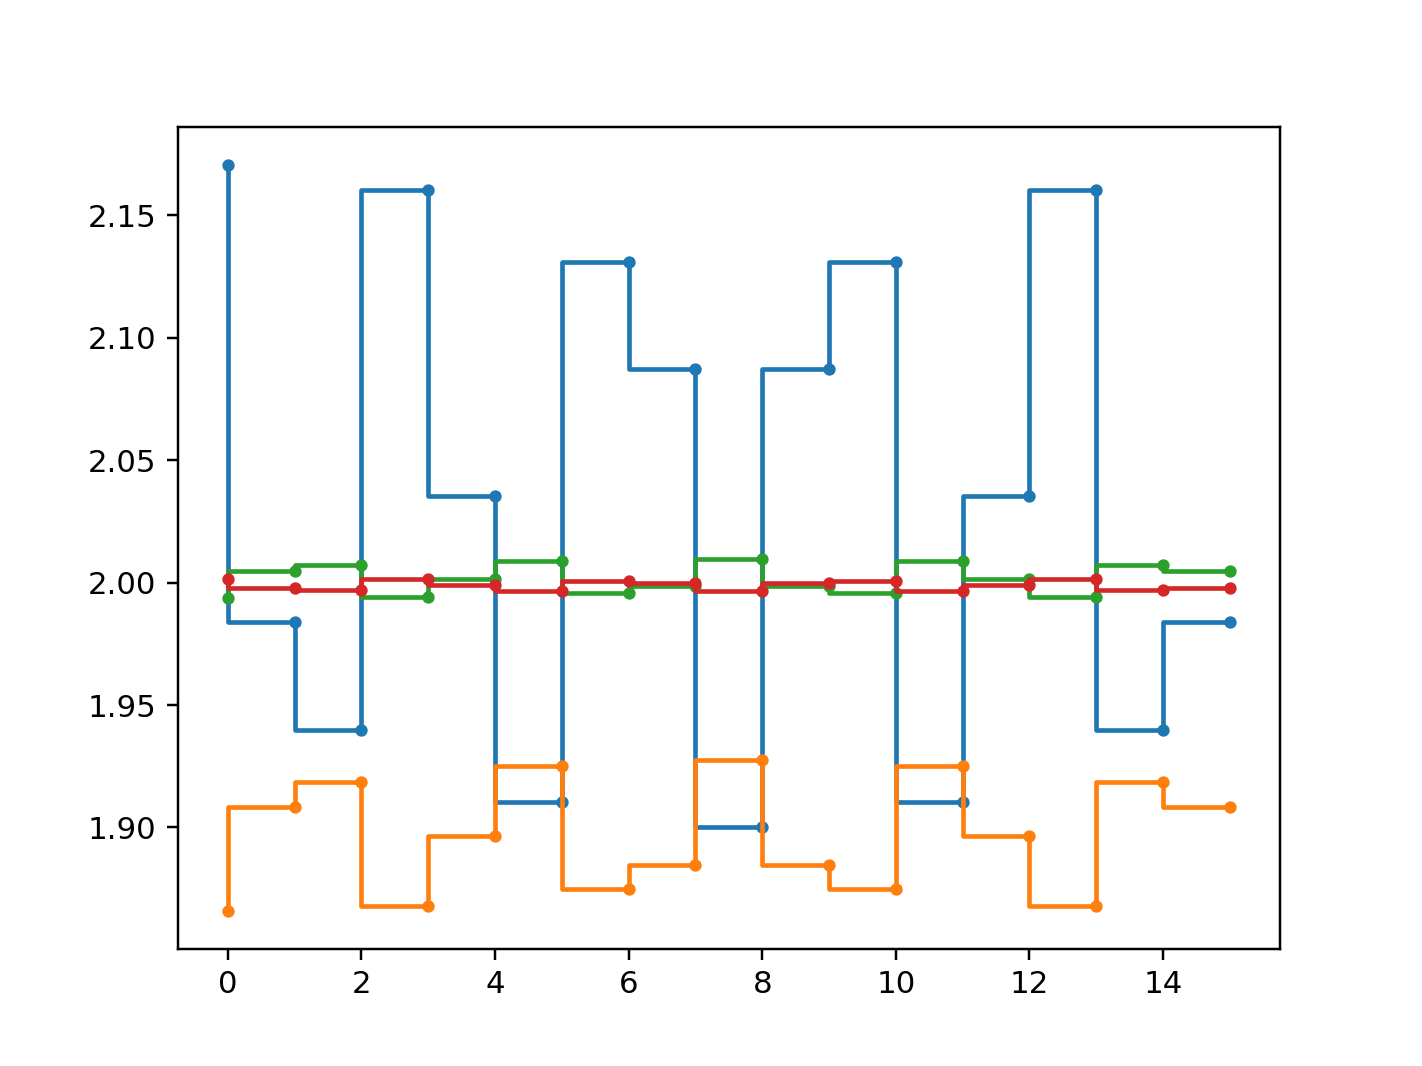

In [54]:
# To converge, we need many more iteration
plt.figure()
def gen_variance(N):
    var_sf = np.zeros(16,dtype=float)
    for i in range(N):
        S = np.zeros(16,dtype=float)
        S[0] = scipy.stats.norm.rvs()
        S[5] = scipy.stats.norm.rvs()
        SF = np.fft.fft(S)
        var_sf += np.real(SF*np.conj(SF))
    var_sf /= N
    return var_sf
var_sf = gen_variance(100)
plt.step(np.arange(len(var_sf)),var_sf,'.-')
var_sf = gen_variance(1000)
plt.step(np.arange(len(var_sf)),var_sf,'.-')
var_sf = gen_variance(10000)
plt.step(np.arange(len(var_sf)),var_sf,'.-')
var_sf = gen_variance(100000)
plt.step(np.arange(len(var_sf)),var_sf,'.-')

<IPython.core.display.Javascript object>


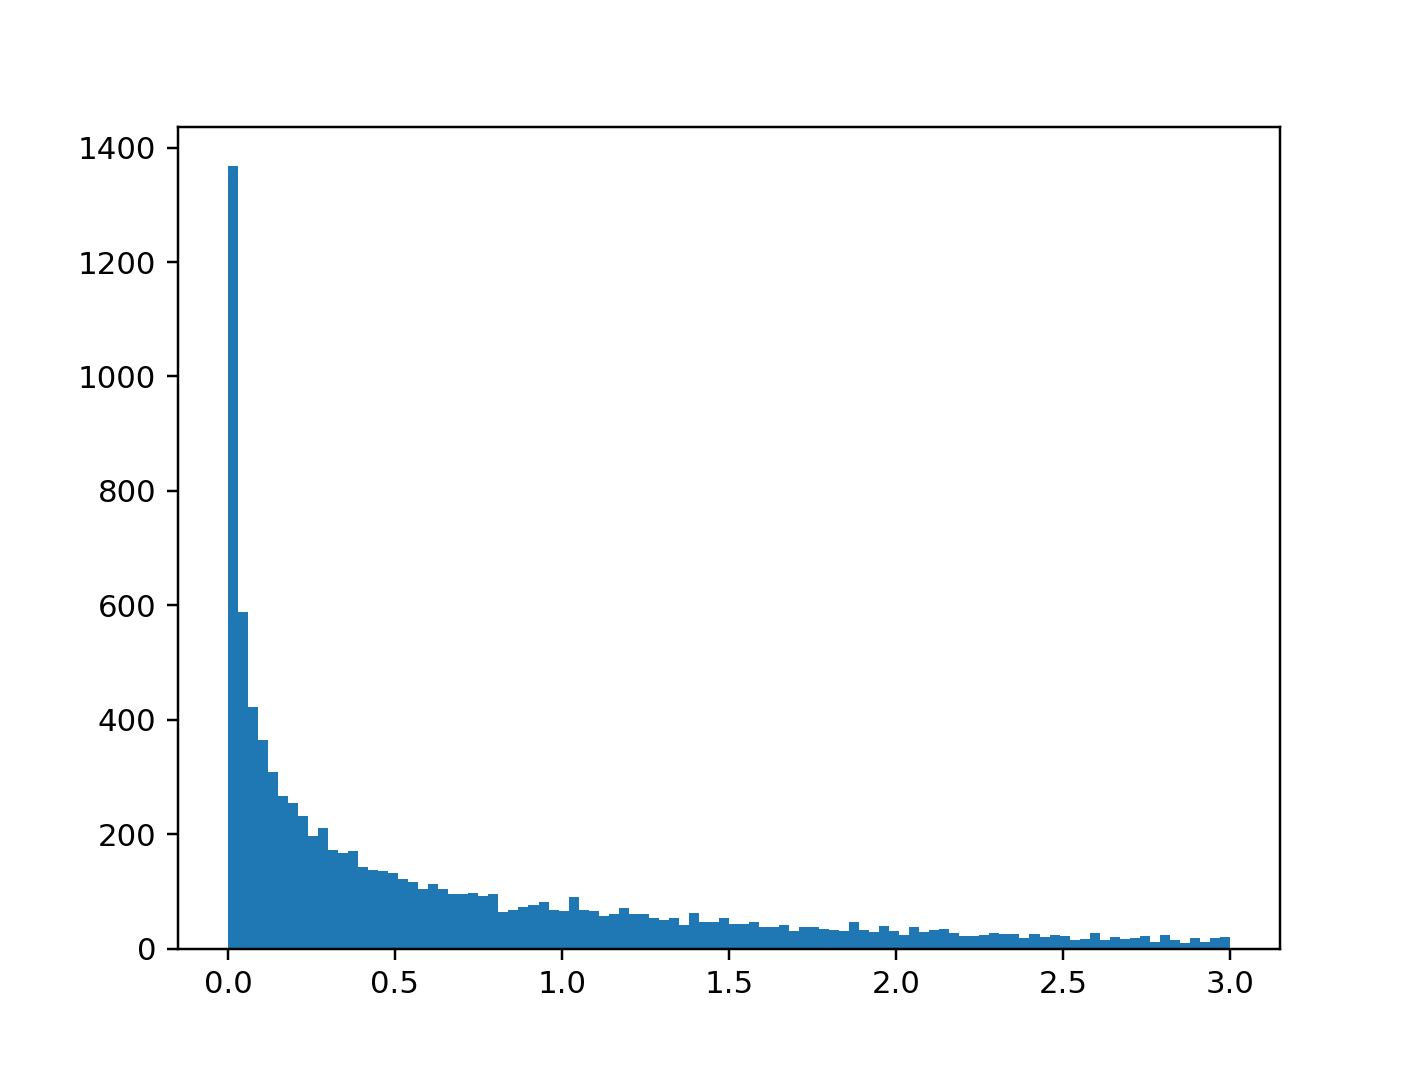

In [101]:
# Convergence is rather slow; T^2 is chi^2 w/ 1-dof per definition
T = scipy.stats.norm.rvs(size=10000)
plt.figure()
_ = plt.hist(T*T,bins=100,range=(0,3))

Now see what if we intorduce correlation, one data point is not independent from the other two:

<IPython.core.display.Javascript object>


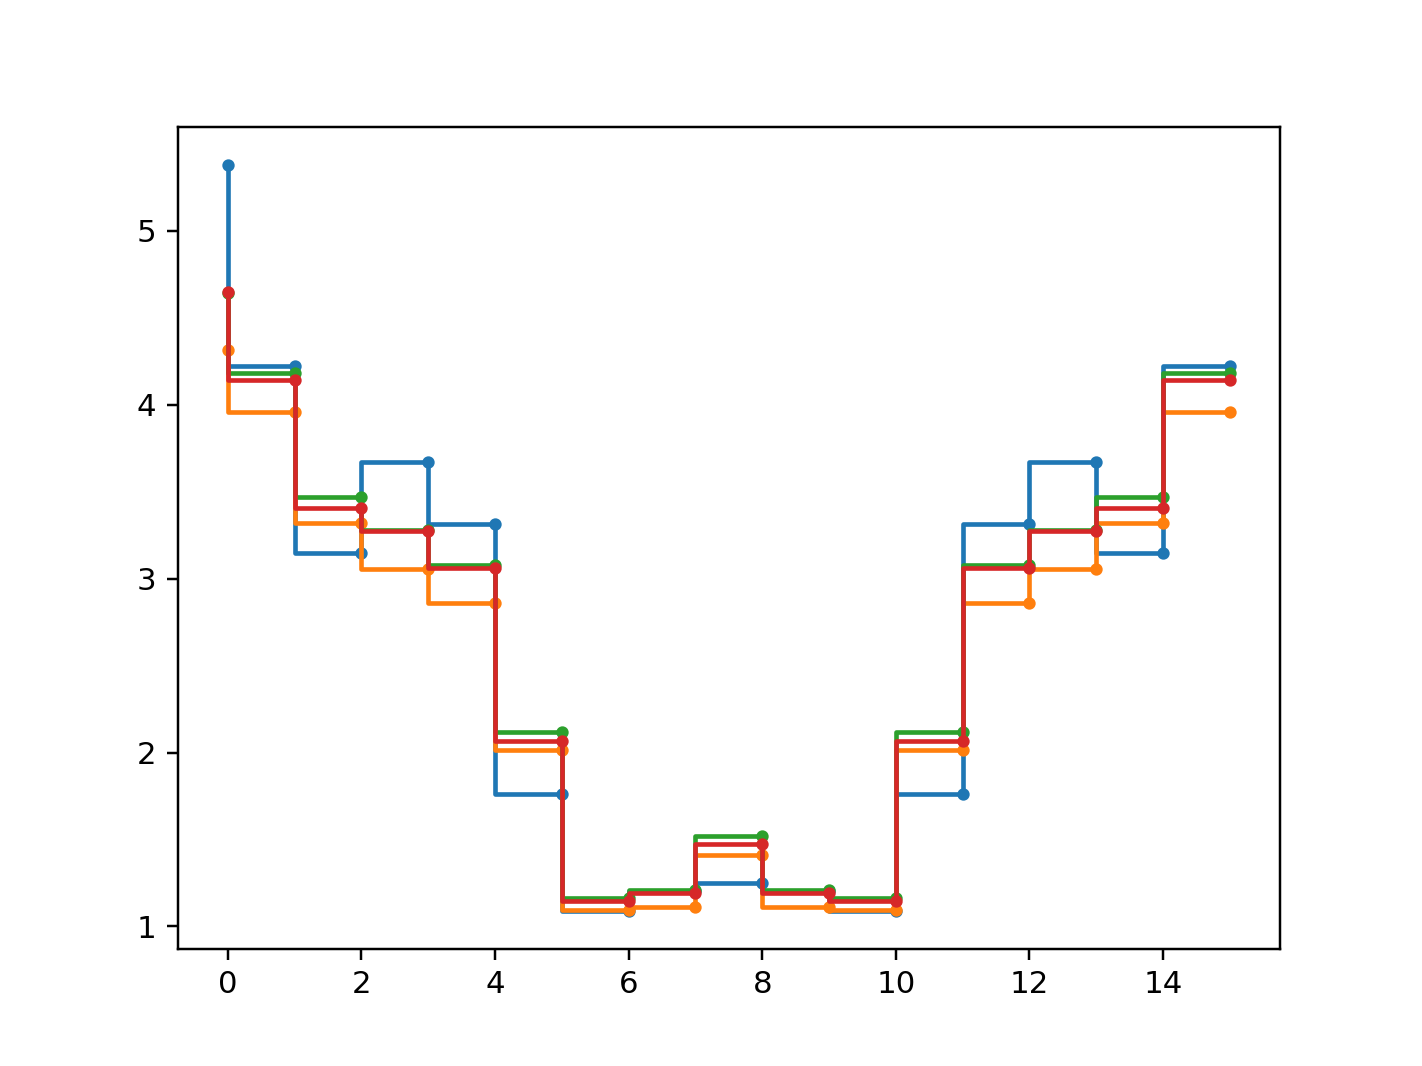

In [94]:
plt.figure()
def gen_variance(N):
    var_sf = np.zeros(16,dtype=float)
    for i in range(N):
        S = np.zeros(16,dtype=float)
        S[0] = scipy.stats.norm.rvs()
        S[5] = scipy.stats.norm.rvs()
        S[1] = 0.8*S[0] + 0.2*S[5]
        SF = np.fft.fft(S)
        var_sf += np.real(SF*np.conj(SF))
    var_sf /= N
    return var_sf
var_sf = gen_variance(100)
plt.step(np.arange(len(var_sf)),var_sf,'.-')
var_sf = gen_variance(1000)
plt.step(np.arange(len(var_sf)),var_sf,'.-')
var_sf = gen_variance(10000)
plt.step(np.arange(len(var_sf)),var_sf,'.-')
var_sf = gen_variance(100000)
plt.step(np.arange(len(var_sf)),var_sf,'.-')

In [38]:
print(np.finfo(float))

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
---------------------------------------------------------------



Now test the numerical accuracy if we shift the image into the high frequency domain before onward and backward fft-s.

Concusion: The relative differences are going higher if the padding is larger. Unless size is a power of 2. The fft algorithm must work differently for power of 2 sizes, then the size of the padding does not matter, the results are exactly the same floating point numbers.



Maximum relative differences: 1.9971190374479102; 1039.8186376977076


<IPython.core.display.Javascript object>


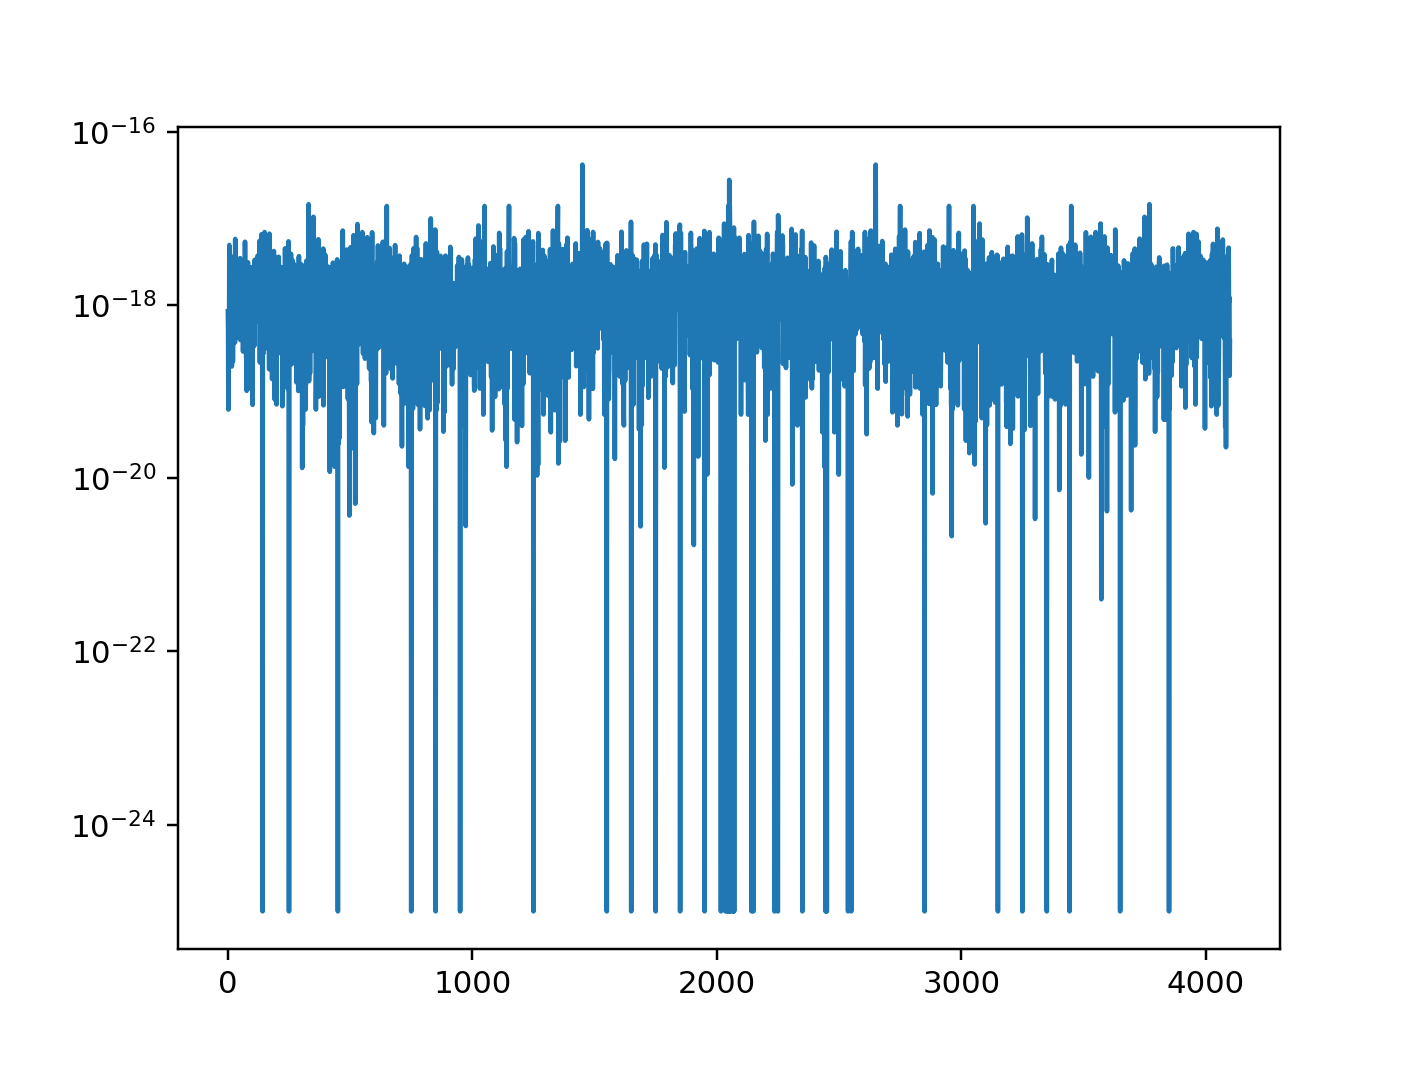

<IPython.core.display.Javascript object>


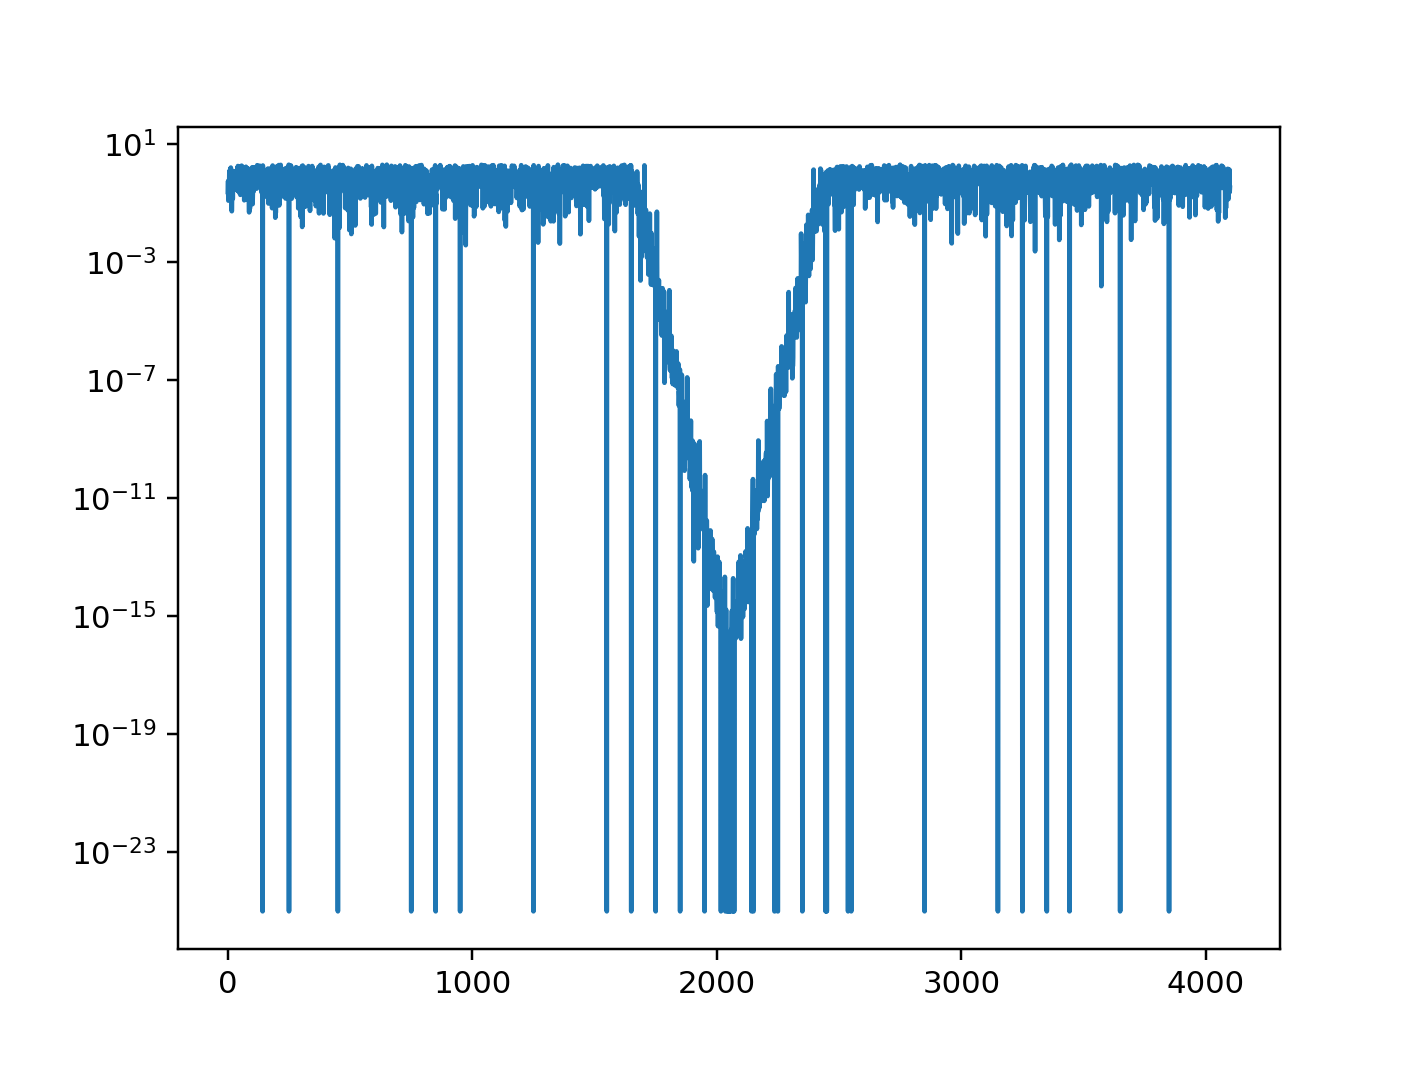

<IPython.core.display.Javascript object>


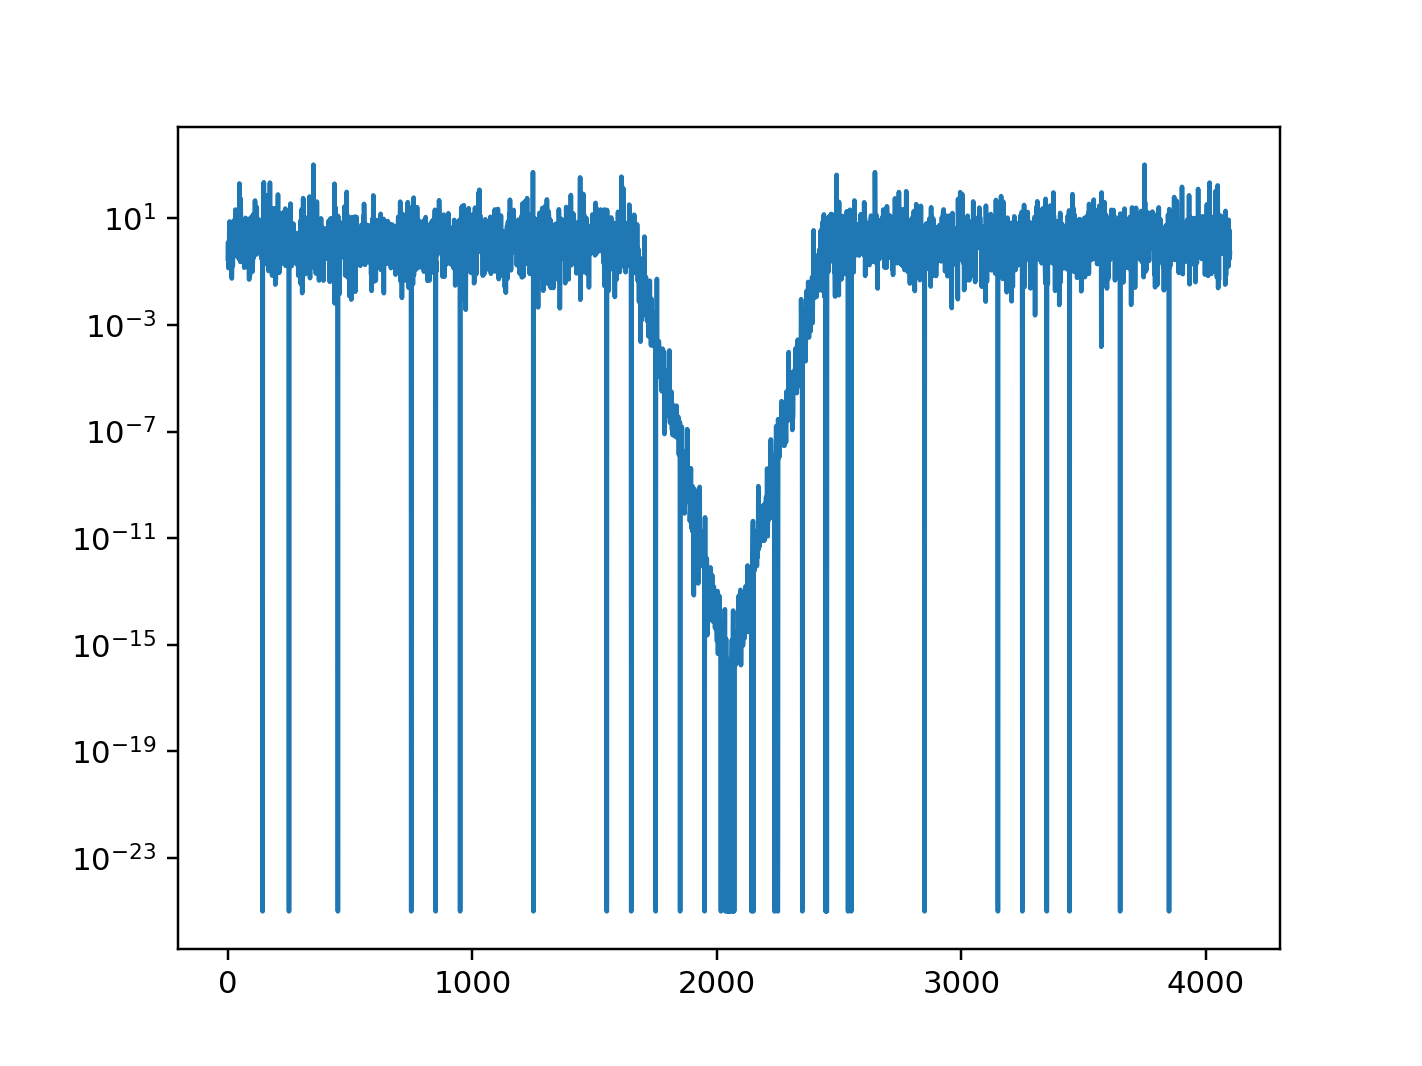

In [87]:
# For the power of 2, results are the same
# but not for e.g. 4100
csize = 4100
K = np.zeros(31,dtype=float)
H = np.ones(csize,dtype=int)
H [1::2] *= -1

K[8:22]=0.3
#K=scipy.stats.norm.pdf(np.arange(-15,15.1),scale=10.)
#K /= np.sum(K)
osize = len(K)

KP = padCenterOriginArray(K,(csize,))
KP *= H
KPF = np.fft.fft(KP)
decorrF = np.sqrt(np.real(2./(1.+KPF*np.conj(KPF))))
decorrK = np.real(np.fft.ifft(decorrF))

# Remove oscillation
decorrK1 = decorrK * H
#decorrK1 = decorrK

#K=scipy.stats.norm.pdf(np.arange(-15,15.1),scale=10.)
#K /= np.sum(K)
KP = padCenterOriginArray(K,(csize,))
KPF = np.fft.fft(KP)
decorrF = np.sqrt(np.real(2./(1.+KPF*np.conj(KPF))))
decorrK = np.real(np.fft.ifft(decorrF))


decorrDiff = decorrK - decorrK1
decorrDiff = np.abs(decorrDiff)
decorrK = np.abs(decorrK)
decorrK1 = np.abs(decorrK1)
rdiff1 = decorrDiff / (np.maximum(decorrK,decorrK1)+1e-20)
rdiff2 = decorrDiff / (np.minimum(decorrK,decorrK1)+1e-20)
print (f"Maximum relative differences: {np.max(rdiff1)}; {np.max(rdiff2)}")

plt.figure()
plt.plot(np.arange(len(decorrDiff)),
        np.abs(padCenterOriginArray(decorrDiff,(csize,),onwardOp=False))+1e-25,'-')
plt.yscale('log')

plt.figure()
plt.plot(np.arange(len(decorrDiff)),
        np.abs(padCenterOriginArray(rdiff1,(csize,),onwardOp=False))+1e-25,'-')
plt.yscale('log')

plt.figure()
plt.plot(np.arange(len(decorrDiff)),
        np.abs(padCenterOriginArray(rdiff2,(csize,),onwardOp=False))+1e-25,'-')
plt.yscale('log')
